<a id="idtest"></a>


###### top


### 1) Go to: [Running Excluding Undefined (middle) Region](#Running-excluding-undefined-middle-region)

### 2) Go to: [Running while KEEPING Undefined Data](#Re-Running-excluding-undefined-middle-region)

[top](#top) | [bottom](#bottom)

# Running excluding undefined middle region


### Load in pre-Trained Semi-supervised Models

In [274]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')
import glob 
model_file_ls = glob.glob('output_model_fitting/popt-ssrfN56559*/models/*.pickle')



print("Total trained models:",len(model_file_ls))



Total trained models: 20


In [275]:
feature_encodings_dict = {
    'one-hot':'oh',
    'bow-countvect':'bowcv',
    'bow-gensim':'bowgen',
    'bow-gensim-weights':'bowgenw',
    'ann-keras':'annk',
    'ann-word2vec-gensim':'w2v',
    'ann-word2vec-gensim-cbow':'w2vcbow',
    'ann-word2vec-gensim-skipgram':'w2vsg',
    'ann-fasttext-cbow':'annftxcbow',
    'ann-fasttext-skipgram':'annftxsg',
    'ann-fasttext-class-trained':'annftlab',
    'glove':'glv',
    'glove-one-line':'glvol',

}


rev_feature_encodings_dict ={
    'oh' : 'one-hot',
    'bowcv' : 'bow-countvect',
    'bowgen' : 'bow-gensim',
    'bowgenw' : 'bow-gensim-weights',
    'annk' : 'ann-keras',
    'w2v' : 'ann-word2vec-gensim',
    'w2vcbow' : 'ann-word2vec-gensim-cbow',
    'w2vsg' : 'ann-word2vec-gensim-skipgram',
    'annftxcbow' : 'ann-fasttext-cbow',
    'annftxsg' : 'ann-fasttext-skipgram',
    'annftlab' : 'ann-fasttext-class-trained',
    'glv' : 'glove',
    'glvol' : 'glove-one-line',
}

feature_encodings_titles_dict = {
    'one-hot':                          'One-Hot',
    'bow-gensim-weights':               'Bag-of-Words',
    'ann-word2vec-gensim-cbow':         'Word2Vec CBOW',
    'ann-word2vec-gensim-skipgram':     'Word2Vec Skip-Gram',
    'ann-fasttext-cbow':                'Fast-Text CBOW',
    'ann-fasttext-skipgram':            'Fast-Text Skip-Gram',
    'ann-fasttext-class-trained':       'Fast-Text CBOW class-trained',
    'glove':                            'GloVe',
    'glove-one-line':                   'GloVe one Corpus',
}

# To reverse:
# for k in list(feature_encodings_dict.keys()):
#     print("'"+feature_encodings_dict[k]+"'"+" : "+"'"+k+"',")
#     
# for k in list(feature_encodings_titles_dict.keys()):
#     print("'"+feature_encodings_titles_dict[k]+"'"+" : "+"'"+k+"',")
    

In [276]:
model_type_dict = {}
model_file_dict = {}

# [feature_encodings_titles_dict[rev_feature_encodings_dict[
#     x.split('_model_')[-1].replace('.pickle','').split('_')[-1]]]
#  for x in model_file_ls]

for x in model_file_ls:
    
    enc_ = feature_encodings_titles_dict[ rev_feature_encodings_dict[
            x.split('_model_')[-1].replace('.pickle','').split('_')[-1]]]
    
    model_type_dict[x] = enc_
    
    try:
        model_file_dict[enc_].append(x)
    except:
        model_file_dict[enc_] = [x]
    

# model_file_dict['Word2Vec Skip-Gram'][0]


# Load in Data and embed it

In [277]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
import os


df_combined_by_screen  = pd.read_csv('new_input_data/'+'FOR-SSRF-MODEL-TRAINING-EVAL_new_screen_model_evaluation_round_2_FEB-14-2025.csv')
df_combined_by_screen['dataset'] = len(df_combined_by_screen)*['external']
df_combined_by_screen

,oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,...,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class,dataset
0,BCAM1_139,BCAM1,NaN,139,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
1,BCAM1_140,BCAM1,NaN,140,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
2,BCAM1_370,BCAM1,NaN,370,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
3,BCAM1_666,BCAM1,NaN,666,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
4,BCAM1_709,BCAM1,NaN,709,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MSH3_4010,MSH3,NaN,4010,XR_931597;XM_017006081;NM_001286793;NM_0012867...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
116,MSH3_4035,MSH3,NaN,4035,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
117,MSH3_4036,MSH3,NaN,4036,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
118,MSH3_4068,MSH3,NaN,4068,NM_002439,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external


# Embed Data 

In [278]:
## Embedding Helper Methods

# helper functions

# helper functions
def get_kmers_(seq__, kmer_size__, window_size__):
    """ Returns kmers for a SINGLE sequence """
    kmers_ = [''.join(seq__[i:kmer_size__+i]) for i in range(len(seq__)-kmer_size__+window_size__)[::window_size__]]
    kmers_ = [x for x in kmers_ if x != '']
    return kmers_

## Testing:
## get_kmers_('TTCAAAAATAGTGACTCAGAAAAGGACAATTCAAAAAGGACATTAC',kmer_size__ = 6,window_size__ = 1)

def pad_list_(list_, ref_len_):
    # Create an array of zeros with the reference shape
    to_pad_ = ref_len_-len(list_)
    return list_+[0]*to_pad_

def pad_corpus_(list_, ref_len_):
    # Create an array of zeros with the reference shape
    to_pad_ = ref_len_-len(list_)
    return list_+['']*to_pad_

## Helper Methods


# Function Definitions
def classify(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 'efficient'
    elif expr>=ineff_co:
        return 'inefficient'
    else:
        return 'undefined'

# Function Definitions
def classify_numeric(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 1
    elif expr>=ineff_co:
        return 0
    else:
        return -1
    
def classify_no_undefined(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 'efficient'
    elif expr>=ineff_co:
        return 'inefficient'
    else:
        return 'inefficient'
    
def classify_numeric_no_undefined(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 1
    elif expr>=ineff_co:
        return 0
    else:
        return 0

# def get_flank_by_substring(long, short, includes_target_region, flank_len):
#     try:
#         indx = long.replace('T','U').index(short.replace('T','U'))
#         if includes_target_region:
#             return long[((indx-3)-flank_len):((indx-3)+20+flank_len)]
#         else:
#             return long[((indx-3)-flank_len):(indx-3)] + 'X'*20 + long[((indx-3)+20):((indx-3)+20+flank_len)]
#     except:
#         #return False
#         return np.nan

def get_kmers(seq__, kmer_size__, window_size__):
    """ Returns kmers for a SINGLE sequence """
    return [''.join(seq__[i:kmer_size__+i]) for i in range(len(seq__)-kmer_size__+window_size__)]
## Testing:
## get_kmers('TTCAAAAATAGTGACTCAGAAAAGGACAATTCAAAAAGGACATTAC',kmer_size__ = 6,window_size__ = 1)


def one_hot(seq):
    one_hot_dict = {'A':[1,0,0,0],
                'U':[0,1,0,0],'T':[0,1,0,0],
                'C':[0,0,1,0],
                'G':[0,0,0,1],
                'X':[0,0,0,0]
               }
    return np.array([item for sublist in [one_hot_dict[x] for x in list(seq)] for item in sublist]) # flatten
## Testing:
## df['one-hot_encoded_flanking_sequence'] = df[flank_seq_working_key].apply(lambda x: one_hot(str(x)))


def get_20mer_sequence(seq_16mer, flank_seq):
    ix_ = flank_seq.index(seq_16mer)
    ## Get 20mer:
    return flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
    
def get_flanking_sequence(seq_16mer, flank_seq, flank_len, include_20mer = True):
    # Uses 16mer "homology region" to find the 20mer
    import numpy as np
    seq_16mer = seq_16mer.replace('U','T')
    flank_seq = flank_seq.replace('U','T')
    try:
        ix_ = flank_seq.index(seq_16mer)
        
        # NOTE: this code gets just the 20mer --> flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
        
        ## Get flanks with 20mer:
        if include_20mer:
            try:
                final_seq = flank_seq[ (ix_ - 3) - flank_len : ( ix_ + 16 + 1 )+ flank_len ] # based off 20mer
                if len(final_seq) != (flank_len*2) + 20 :
                    print("WARNING: final sequence did not match expected ("+str((flank_seq*2) + 20)+"nt) length for 16mer:",seq_16mer)
                return final_seq
            except:
                #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer)
                return ''#np.nan
        ## Get flanks WITHOUT 20mer :
        else:
            try: #UPDATE: 0CT-5-2023 Removed 'XXXXXXXXXXXXXXXXXXXX' from 20mer in cases where flanks only (hurts performance of methods that use kmers - possibly because using X's and finding other sequences were similar?)
                #final_seq = flank_seq[ (ix_ - 3 ) - flank_len : ix_ - 3 ] + 'X'*20 + flank_seq[ ix_ + 16 + 1 : (ix_ + 16 + 1) + flank_len ]# based off 20mer
                #if len(final_seq) !=  (flank_len*2) + 20 :
                final_seq = flank_seq[ (ix_ - 3 ) - flank_len : ix_ - 3 ] + flank_seq[ ix_ + 16 + 1 : (ix_ + 16 + 1) + flank_len ]# based off 20mer
                if len(final_seq) !=  (flank_len*2):# + 20 :
                    print("WARNING: final sequence did not match expected ("+str((flank_seq*2) + 20)+"nt) length for 16mer:",seq_16mer)
                return final_seq
            except:
                #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer)
                return ''#np.nan
    # 16mer not found in flanking sequence 
    except: 
        #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer,'(16mer not found in flanking sequence)')
        return ''#np.nan


def get_20mer_from_16mer(seq_16mer, flank_seq, seq_20mer_from_dataset, mismatch_to_flank ):
    # Uses 16mer "homology region" to find the 20mer
    import numpy as np
    # First check that 16mer can be used to find the 20mer, if not try returning given 20mer from starting dataset (NOTE: this is not done in find flanking region methods because 20mers are defined while flanking regions often are not -- i.e. finding flanks with cross-species reactive siRNAs where there might not be a perfect 20mer match)
    if mismatch_to_flank != '16mer perfect match to target':
        if type(seq_20mer_from_dataset) == str:
            if len(seq_20mer_from_dataset) == 20:
                return seq_20mer_from_dataset
        else:
            #print("WARNING: when calling get_20mer_from_16mer() for 16mer ( "+str(seq_16mer)+" ) there was a mismatch_to_flank  so could not compute 20mer with get_20mer_from_16mer(), but '20mer_targeting_region' from starting dataset was: "+str(seq_20mer_from_dataset))
            return np.nan
    else:
        seq_16mer = seq_16mer.replace('U', 'T')
        flank_seq = flank_seq.replace('U', 'T')
        flank_len = 0 # since getting just the 20mer
        try:
            ix_ = flank_seq.index(seq_16mer)
            # NOTE: this code gets just the 20mer --> flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
            try:
                final_seq = flank_seq[(ix_ - 3) - flank_len: (ix_ + 16 + 1) + flank_len]  # based off 20mer
                if len(final_seq) != 20:
                    #print("WARNING: when calling get_20mer_from_16mer() final sequence did not match expected (20nt) length for 16mer:", seq_16mer)
                    return np.nan
                return final_seq
            except:
                #print("WARNING: when calling get_20mer_from_16mer() could not get 20mer sequence for 16mer:", seq_16mer)
                return np.nan
        # 16mer not found in flanking sequence
        except:
            #print("WARNING:when calling get_20mer_from_16mer() could not get 20mer sequence for 16mer:", seq_16mer, '(16mer not found in flanking sequence)')
            return np.nan
    
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

# print(rgb_to_hex(255, 165, 1))

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    import seaborn as sns
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    rgb = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    rgb = [round(x*256) for x in list(rgb)]
    
    return rgb_to_hex(rgb[0],rgb[1],rgb[2])
    #'#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def make_gradient_color_scheme(size,color_ls,plot_pal=True):
    '''
    Output list of hex colors for color scheme also displays a plot of the color pallette 
    Inputs:
        size = number of colors in color scheme
        color_ls = list of colors to be used in making gradient
            * can be any length < size
            * if only one color is given other color in gradient will be set to white)
        plot_pal = boolean if True will plot a palplot
    '''
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    norm = matplotlib.colors.Normalize(-1,1)
    
    if len(color_ls) == 1:
        color_ls.append("#ffffff")
    grad_cols = [[norm(-1.0), color_ls[0]] ] # first already determined
    if len(color_ls)>len(grad_cols)-1:
        i=1
        while i<len(color_ls)-1: 
            grad_cols.append([norm( i*(2/(len(color_ls)-1))+(-1)), color_ls[i]])
            i+=1
    grad_cols.append([norm(1.0), color_ls[-1]]) # last already determined
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_cols)
    hex_cols = []
    for i in range(cmap.N): 
        if i%int(cmap.N/size)==0: # cmp1.N is 256 
            rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
            hex_cols.append(matplotlib.colors.rgb2hex(rgb))
    
    if plot_pal:
        sns.palplot(hex_cols)
        print(hex_cols)
    return(hex_cols)    
    
# # Testing:
# # s16_ = 'GGAAGAATCTATATGT' 
# # sflank_ = 'ACAATCTAGGCAAGGAAGTGAGAGCACATCTTGTGGTCTGCTGAGTTAGGAGGGTATGATTAAAAGGTAAAGTCTTATTTCCTAACAGTTTCACTTAATATTTACGGAAGAATCTATATGTAGCCTTTGTAAAGTGTAGGATTGTTATCATTTAAAAACATCATGTACACTTATATTTGTATTGTATACTTGGTAAGATAAAATTCCACAAAGTAGGAATGGGGCC' 
# i_ = 20
# flen_ = 10
# sflank_ = df.iloc[i_]['flanking_sequence_1']
# s16_ = df.iloc[i_]['16mer_complementary_region']
# print(s16_)
# print(df.iloc[i_]['20mer_targeting_region'].replace('U',"T"))

# print(get_flanking_sequence(s16_, sflank_, flen_, False))
# print(get_flanking_sequence(s16_, sflank_, flen_, True))

def embed_sequences_with_gensim_word2vec_cbow(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    ''' NEW UPDATED WORD2VEC METHOD'''
    ## UPDATED to use Word2Vec correctly - using CBOW (Continuous Bag Of Words): Using the context to predict a target word
    ## https://michael-fuchs-python.netlify.app/2021/09/01/nlp-word-embedding-with-gensim-for-text-classification/#gensim---word2vec
    from gensim.models import Word2Vec

    vector_size_n_w2v = 120 # TODO: update to something higher(?) 100?

    w2v_model = Word2Vec(vector_size=vector_size_n_w2v,
                         window=5, # number of words to consider on each side for the context TODO: update to larger value?
                         min_count=word_freq_cutoff_,
                         sg=0 ) # 0=CBOW, 1=Skip-gram

    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    w2v_model.build_vocab(texts_sirna) # Create the vocabulary, which is to be learned by Word2Vec
    ##**#print(w2v_model)

    w2v_model.train(texts_sirna, # Train Neural Network over 5 epochs (NOTE: this can take some time)
                    total_examples=w2v_model.corpus_count,
                    epochs=50) # TODO: update epochs?

    # Save to Word2Vec Model (and the vector size
    w2v_model.save("embedding_dictionaries/word2vec_model")
    import pickle as pk
    pk.dump(vector_size_n_w2v, open('embedding_dictionaries/vector_size_w2v_metric.pkl', 'wb'))

    # # EXAMPLE: Output of the calculated vector for a given word (kmer) from the vocabulary:
    # single_example_kmer__ = texts_sirna[0][0]
    # w2v_model.wv[single_example_kmer__]
    # # EXAMPLE: Display the words that are most similar to a given word from the vocabulary:
    # w2v_model.wv.most_similar(single_example_kmer__)

    # Generate aggregate sentence vectors based on the kmer vectors for each kmer in the given sequence
    words = set(w2v_model.wv.index_to_key)
    import numpy as np
    text_vect_ls = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                                for ls in texts_sirna ])

    # NOTE: since specify vector initially no need to pad them (since all same length)
    # Generation of averaged Sentence Vectors
    text_vect_avg = []
    for v in text_vect_ls:
        if v.size:
            text_vect_avg.append(list(v.mean(axis=0)))
        else:
            text_vect_avg.append(list(np.zeros(vector_size_n_w2v, dtype=float))) # the same vector size must be used here as for model training

    # TODO: for troubleshotting (delete later)
    # #**#print("\n\n\n\n\n\n**********************************  WORD2VEC-NEW  ***************************************\n\n")
    # for t in text_vect_avg[0:10]:
    #     #**#print(t)
    # #**#print("\n\n**********************************  WORD2VEC-NEW  ***************************************\n\n\n\n\n")
    # NOTE: could move forward and train model based on siRNA efficacy, but not doing that here (just using word2vec to represent/embed data)

    return text_vect_avg

# Darken Hex Colors
# Need to have installed:
# pip install colormap
# pip install easydev

    


#### Note Efficacy cutoff (`effco__`) was increased for evaluation of experimental data from 25% to 35%


In [279]:
embedding_ = 'GloVe'#word2vec_skip-gram'

kmer_size___ =9
flank_len___ =20
window_size___ =1 
word_freq_cutoff___ =1


normalized___ = True
effco___ = 35
ineffco___ = 60
# remove_undefined___ =True




# Prepare sequences for embedding

In [280]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
import os

df_combined_by_screen_with_unlab = df_combined_by_screen.copy()
df_combined_by_screen_with_unlab.reset_index(inplace=True,drop=True)

display(df_combined_by_screen_with_unlab['dataset'].value_counts())

display(df_combined_by_screen_with_unlab.head())

print(len(df_combined_by_screen_with_unlab))


external    120
Name: dataset, dtype: int64

,oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,...,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class,dataset
0,BCAM1_139,BCAM1,NaN,139,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
1,BCAM1_140,BCAM1,NaN,140,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
2,BCAM1_370,BCAM1,NaN,370,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
3,BCAM1_666,BCAM1,NaN,666,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
4,BCAM1_709,BCAM1,NaN,709,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external


120


In [281]:
df_combined_by_screen_with_unlab['seqs_to_embed'] = df_combined_by_screen_with_unlab.apply(
    lambda x: get_flanking_sequence(seq_16mer = x['16mer_complementary_region'], 
     flank_seq = x['flanking_sequence_1'], 
     flank_len = flank_len___, 
     include_20mer = True), axis = 1)


len_before_ = len(df_combined_by_screen_with_unlab)
df_combined_by_screen_with_unlab.drop(index=list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['seqs_to_embed'].isna()].index),inplace=True)
df_combined_by_screen_with_unlab.reset_index(inplace=True,drop=True)
print("Dropped "+str(len_before_-len(df_combined_by_screen_with_unlab))+" siRNAs because could not get 20mer + flanking region sequences.\n Number of siRNAs remaining:",len(df_combined_by_screen_with_unlab))

display(df_combined_by_screen_with_unlab['seqs_to_embed'].head())



Dropped 0 siRNAs because could not get 20mer + flanking region sequences.
 Number of siRNAs remaining: 120


0    GTGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGT...
1    TGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTC...
2    CTGGTGCTGGCTGAGGCCCAGGTGGGCGACGAGCGAGACTACGTGT...
3    GGTCCGGGAGGCCTCGGGCCTGCTCTCCCTCACCAGCACCCTCTAC...
4    TACCTGCGGCTCCGCAAGGATGACCGAGACGCCAGCTTCCACTGCG...
Name: seqs_to_embed, dtype: object

In [282]:
embedding_

'GloVe'

# Embed Sequence Data
#### (will take some time to run)

In [283]:
## EMBED SEQUENCES
# embedding_ = 'GloVe'
# embedding_ = 'glove_one_corpus'
# 'glv-4QOZBR'
# def embed_sequences_all_embeddings(embedding_)

# seq_ls
from embedding_methods import one_hot_encode_sequences

# seq_ls, kmer_size_, window_size_, word_freq_cutoff_
from embedding_methods import embed_sequences_with_gensim_word2vec

from embedding_methods import embed_sequences_with_gensim_word2vec_cbow
from embedding_methods import embed_sequences_with_gensim_word2vec_skipgram
from embedding_methods import embed_sequences_with_fasttext_cbow
from embedding_methods import embed_sequences_with_fasttext_skipgram

from embedding_methods import embed_sequences_with_glove
from embedding_methods import embed_sequences_with_glove_one_line



if embedding_ == 'one-hot':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = one_hot_encode_sequences(list(df_combined_by_screen_with_unlab['seqs_to_embed']))

elif embedding_ == 'bag-of-words':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'word2vec_cbow':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec_cbow(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'word2vec_skip-gram':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec_skipgram(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'fasttext_cbow':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_fasttext_cbow(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'fasttext_skip-gram':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_fasttext_skipgram(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'GloVe':
    #df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_glove(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = load_glove_embeddings(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'glove_one_corpus':
    #df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_glove_one_line(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = load_glove_one_line_embeddings(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

display(df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'].head())



0    [-0.257116, 0.293686, -0.173462, -0.110009, 0....
1    [0.178455, 0.513538, -0.000838, 0.193115, 0.03...
2    [0.053905, 0.646998, 0.146936, -1.699004, 0.54...
3    [-0.021651, 0.66886, -0.980711, 0.013622, -0.3...
4    [0.327192, 0.488377, 0.560764, 0.676814, 0.685...
Name: GloVe_embedded_sequences, dtype: object

In [284]:
df_combined_by_screen_with_unlab['dataset'].value_counts()

external    120
Name: dataset, dtype: int64

In [285]:
remove_undefined_ = True
# Classify data (set undefined to 0 or inefficient)

indxs_selected_dataset_ = list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['dataset'] == 
                                    'external'].index)
len(indxs_selected_dataset_)


if remove_undefined_:
    print("NOTE: EXCLUDING UNDEFINED DATA!\n\t REMOVE UNDEFINED SET TO :",remove_undefined_)
    df_combined_by_screen_with_unlab['numeric_class'] = df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: classify_numeric(x, effco___, ineffco___))
    indxs_to_include_combined_by_screen_with_unlab_ = list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['numeric_class'] != -1].index)
    indxs_to_include_combined_by_screen_with_unlab_ = [x for x in indxs_to_include_combined_by_screen_with_unlab_ if x in indxs_selected_dataset_]
    print("\tNumber of siRNAs included (not undefined):",len(indxs_to_include_combined_by_screen_with_unlab_))
    display(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts())

else:
    print("NOTE: INCLUDING UNDEFINED DATA!\n\t  REMOVE UNDEFINED SET TO :",remove_undefined_)
    df_combined_by_screen_with_unlab['numeric_class'] = df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: classify_numeric_no_undefined(x, effco___, ineffco___))
    indxs_to_include_combined_by_screen_with_unlab_ = [x for x in indxs_to_include_combined_by_screen_with_unlab_ if x in indxs_selected_dataset_]
    display(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts())

print('length indxs_to_include_combined_by_screen_with_unlab_:',len(indxs_to_include_combined_by_screen_with_unlab_))



NOTE: EXCLUDING UNDEFINED DATA!
	 REMOVE UNDEFINED SET TO : True
	Number of siRNAs included (not undefined): 86


1    48
0    38
Name: numeric_class, dtype: int64

length indxs_to_include_combined_by_screen_with_unlab_: 86


In [286]:
def load_glove_one_line_embeddings(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    '''Uses Global GloVe embeddings that were pre-trained see Jupyter notebook:
        data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/jupyter_notebooks/training_GloVe_embeddings.ipynb

    '''
    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    corpus_file_name_to_load = 'glove/' + 'kmer-' + str(kmer_size_) + '_windw-' + str(window_size_) + '_wfco-' + str(word_freq_cutoff_) + '_glove_corpus_sirnas-as-docs'

    import os
    curdir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization'
    os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/glove')

    # Load in vectors from GloVe fittings
    vectors_file_name = corpus_file_name_to_load.replace('glove/', '') + '_vectors.txt'
    with open(vectors_file_name, 'r+') as f:
        data_ = [x.replace('\n', '') for x in f.readlines()]
    f.close()

    vector_dict_ = {}
    for x in data_:
        vector_dict_[x.split(' ')[0]] = [float(y) for y in x.split(' ')[1:]]

    vect_len_ = len(vector_dict_[list(vector_dict_.keys())[0]])
    # use dictionary of vector values to produce list of embedded data to return
    vects_sirna_ = []
    for t in texts_sirna:
        concat_sirna_target_vector_ = []
        # loops through each kmer in siRNA
        for k in t:
            try:
                concat_sirna_target_vector_ += vector_dict_[k]
            except:
                concat_sirna_target_vector_ += [np.nan]# [0.0] * vect_len_
        vects_sirna_.append(concat_sirna_target_vector_)

    os.chdir(curdir_)
    return vects_sirna_



In [287]:
def load_glove_embeddings(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    '''Uses Global GloVe embeddings that were pre-trained see Jupyter notebook:
        data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/jupyter_notebooks/training_GloVe_embeddings.ipynb

    '''
    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    # Generate corpus with each word (kmer) separated by a space and each document (sirna) separated by a newline
    #corpus_file_name_to_load = 'glove/' + 'kmer-' + str(kmer_size_) + '_windw-' + str(window_size_) + '_wfco-' + str(word_freq_cutoff_) + '_glove_corpus_sirnas-as-docs'

    # with open(corpus_file_name+'.txt', 'w+') as f:
    #     ct_ = 0
    #     for si_ in texts_sirna:
    #         f.write(' '.join(si_) + '\n')
    #         ct_ += 1
    #f.close()
    # print('Sequence data for ' + str(ct_) + ' siRNAs saved to:\n\t', corpus_file_name.split('/')[-1])

    # Load GloVe Fittings
    import os
    curdir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization'
    os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/glove')

    
    # Load in vectors from GloVe fittings
    #vectors_file_name = corpus_file_name_to_load.replace('glove/', '') + '_vectors.txt'
    import glob
    vectors_file_name = glob.glob('glv-4QOZBR*_vectors.txt')[0]

    with open(vectors_file_name, 'r+') as f:
        data_ = [x.replace('\n', '') for x in f.readlines()]
    f.close()

    vector_dict_ = {}
    for x in data_:
        vector_dict_[x.split(' ')[0]] = [float(y) for y in x.split(' ')[1:]]

    vect_len_ = len(vector_dict_[list(vector_dict_.keys())[0]])
    # use dictionary of vector values to produce list of embedded data to return
    vects_sirna_ = []
    for t in texts_sirna:
        concat_sirna_target_vector_ = []
        # loops through each kmer in siRNA
        for k in t:
            try:
                concat_sirna_target_vector_ += vector_dict_[k]
            except:
                concat_sirna_target_vector_ += [0.0] * vect_len_
        vects_sirna_.append(concat_sirna_target_vector_)

    os.chdir(curdir_)
    return vects_sirna_



# Apply pre-trained model to predict efficacies
## Load in picked model

In [306]:
# model_dict_key_ = 'GloVe one Corpus'
model_dict_key_ = 'GloVe'

import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.pylab as pylab
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

clf_ls = []

# os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/semisupervised_model')
# for i_ in range(len(model_file_dict[model_dict_key_ ])):
#     model_file_name_ =  model_file_dict[model_dict_key_][i_]

for model_file_name_ in [x for x in model_file_ls if 'glv.pickle' in x]:
    print(model_file_name_)

    import pickle as pkl
    with open(model_file_name_, 'rb') as f:
        clf = pkl.load(f)
    f.close()

    display(clf)
    clf_ls.append(clf)



output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-2_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-7_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-10_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-5_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-8_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-6_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-3_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-4_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-9_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-1_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

# (for this round only) Get only sequences that are efficient/inefficient 
#### (exclude undefined or -1) --> `indxs_to_include_combined_by_screen_with_unlab_`

In [310]:
len(df_combined_by_screen_with_unlab.iloc[
    indxs_to_include_combined_by_screen_with_unlab_
][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
    embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)])
                                                                                           
                                                                                           
                                                                                           
                                                                                           

86

In [311]:
len(indxs_to_include_combined_by_screen_with_unlab_)

86

In [312]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts()


1    48
0    38
Name: numeric_class, dtype: int64

In [313]:
df_combined_by_screen_with_unlab['numeric_class'].value_counts()

 1    48
 0    38
-1    34
Name: numeric_class, dtype: int64

In [314]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            [
                #embedding_+'_embedded_sequences',
                'numeric_class',
                #'daataset',
                'expression_percent_normalized_by_max_min',
            ]]

,numeric_class,expression_percent_normalized_by_max_min
0,1,7.604094
1,1,29.390607
2,0,63.629556
7,1,19.746587
8,0,78.219200
...,...,...
112,0,92.874470
113,0,100.000000
117,0,79.215425
118,0,79.717505


In [315]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            [embedding_+'_embedded_sequences',
             'numeric_class',
             'dataset',
             'expression_percent_normalized_by_max_min']]


,GloVe_embedded_sequences,numeric_class,dataset,expression_percent_normalized_by_max_min
0,"[-0.257116, 0.293686, -0.173462, -0.110009, 0....",1,external,7.604094
1,"[0.178455, 0.513538, -0.000838, 0.193115, 0.03...",1,external,29.390607
2,"[0.053905, 0.646998, 0.146936, -1.699004, 0.54...",0,external,63.629556
7,"[1.615988, -0.154725, -0.127872, 0.115541, -1....",1,external,19.746587
8,"[0.565046, -0.70098, 0.42356, 0.361378, -0.630...",0,external,78.219200
...,...,...,...,...
112,"[1.336772, -0.540587, 0.628661, 0.728921, -1.1...",0,external,92.874470
113,"[-0.504589, -1.016293, -0.752413, 0.799529, 0....",0,external,100.000000
117,"[0.323862, -0.502649, -0.301123, 0.078677, 0.4...",0,external,79.215425
118,"[0.323935, 1.234292, 1.201066, -0.446273, -0.4...",0,external,79.717505


<BarContainer object of 86 artists>

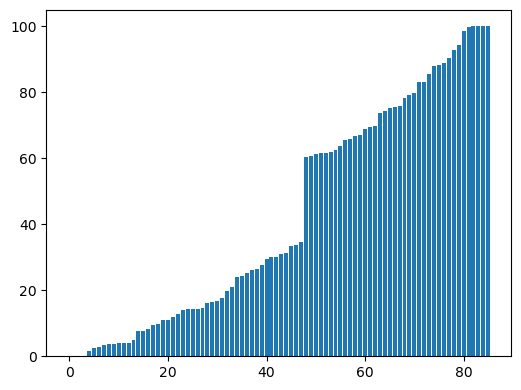

In [316]:
from matplotlib import pyplot as plt
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
    embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            'expression_percent_normalized_by_max_min']
fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

ax.bar(
    x=list(range(len(df_combined_by_screen_with_unlab.iloc[
        indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
        embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]))),
    height=df_combined_by_screen_with_unlab.iloc[
        indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
        embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)].sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
)



In [317]:
df_combined_by_screen_with_unlab[['expression_percent_normalized_by_max_min','numeric_class']]

,expression_percent_normalized_by_max_min,numeric_class
0,7.604094,1
1,29.390607,1
2,63.629556,0
3,55.308416,-1
4,50.564656,-1
...,...,...
115,41.721688,-1
116,55.335765,-1
117,79.215425,0
118,79.717505,0


# Apply Models individually


In [318]:
effco___

35

86 86
F1: 0.6603773584905661
Fbeta: 0.6096311475409836
accuracy: 0.5813953488372093
MCC: 0.13131157477160985

86 86
F1: 0.6538461538461539
Fbeta: 0.6122881355932203
accuracy: 0.5813953488372093
MCC: 0.1348170888721576

86 86
F1: 0.6407766990291262
Fbeta: 0.6045258620689655
accuracy: 0.5697674418604651
MCC: 0.11227694355623229

86 86
F1: 0.6601941747572815
Fbeta: 0.6228448275862067
accuracy: 0.5930232558139535
MCC: 0.16104369681803016

86 86
F1: 0.6730769230769231
Fbeta: 0.6302966101694916
accuracy: 0.6046511627906976
MCC: 0.1839453500713337

86 86
F1: 0.6796116504854369
Fbeta: 0.6411637931034483
accuracy: 0.6162790697674418
MCC: 0.20981045007982801

86 86
F1: 0.6336633663366337
Fbeta: 0.6071428571428571
accuracy: 0.5697674418604651
MCC: 0.11645442978713318

86 86
F1: 0.6730769230769231
Fbeta: 0.6302966101694916
accuracy: 0.6046511627906976
MCC: 0.1839453500713337

86 86
F1: 0.5979381443298969
Fbeta: 0.5925480769230769
accuracy: 0.5465116279069767
MCC: 0.07808669203821687

86 86
F1: 0.6

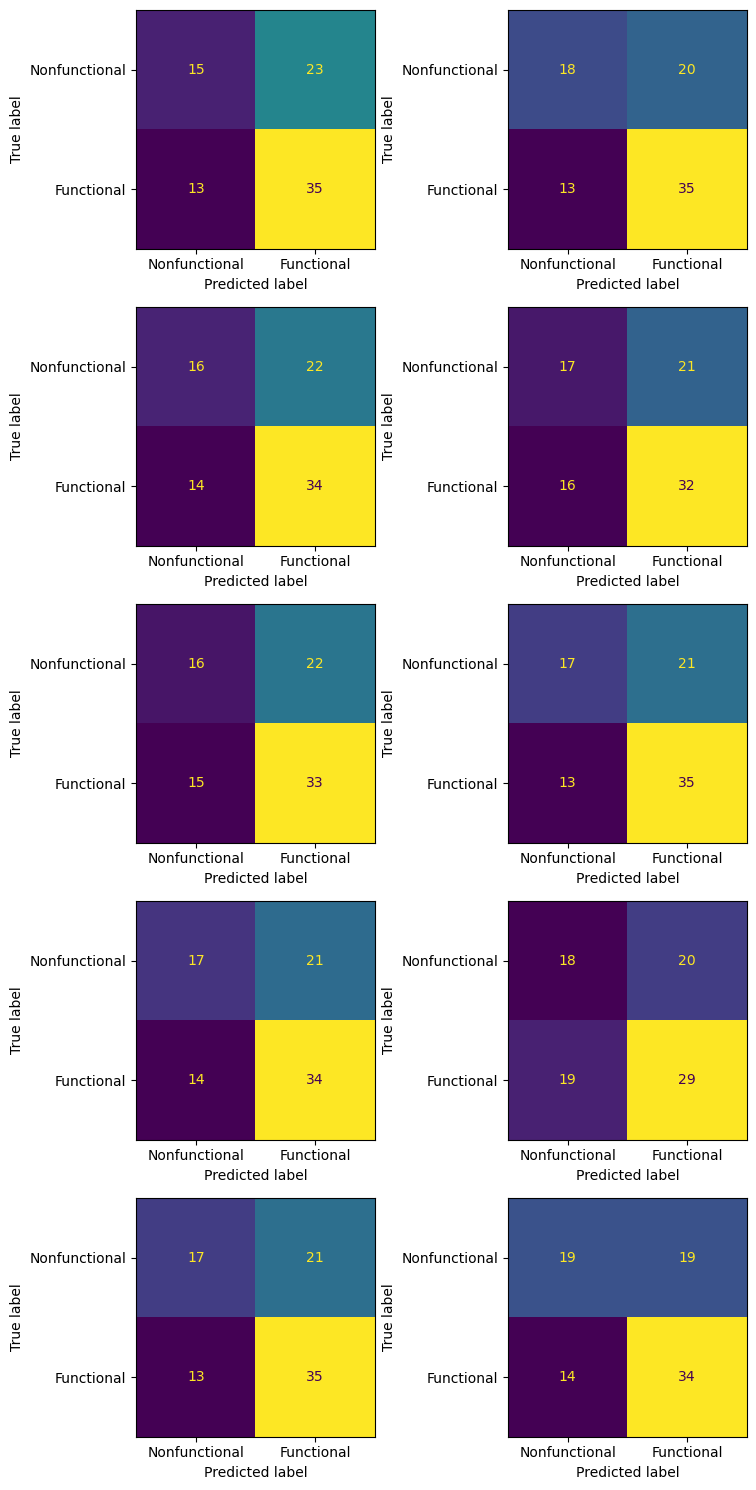

In [319]:
# Apply Models individually
p_ls_2 = []
r_ls_2 = []
fig,axs = plt.subplots(5,2)
fig.set_size_inches(w=8,h=15)
for i_ in range(len(model_file_dict['GloVe'])):
    
    clf_ = clf_ls[i_]
    X_ = np.array([np.array(list(x)) for x in df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)][embedding_+'_embedded_sequences']])
    # Y_ = np.array(df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: x <= 35))
    Y_ = np.array(df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)]['numeric_class'])
    
    
    print(len(X_),len(Y_))
    
    preds_score_ = clf_.predict_proba(X_)[:, 1]
    preds_binary_ = clf_.predict(X_)
    
    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve
    
    p_, r_, t_s = precision_recall_curve(Y_, preds_score_)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_, p_)
    
    p_ls_2.append(p_)
    r_ls_2.append(r_)
    
    from sklearn.metrics import f1_score
    fscore__ = f1_score(Y_, preds_binary_)  # , average=None)
    print('F1:',fscore__)
    
    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_ = fbeta_score(Y_, preds_binary_, beta=f_beta_)  # , average=None)
    # print("Computing fbeta_score with beta = "+str(f_beta_))
    print('Fbeta:',fbetascore_)
    
    from sklearn.metrics import accuracy_score
    accuracy_ = accuracy_score(Y_, preds_binary_)
    print('accuracy:',accuracy_)
    
    from sklearn.metrics import matthews_corrcoef
    mcc_ = matthews_corrcoef(Y_, preds_binary_)
    print('MCC:',mcc_)
    
    print('')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    # tn, fp, fn, tp = confusion_matrix(Y_, preds_binary_).ravel()  
    # ConfusionMatrixDisplay.from_estimator(clf_, X_, Y_)


    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_, preds_binary_),
                                  display_labels=["Nonfunctional","Functional"])
    # Adjust font size for the values inside the matrix
    axi_ = i_%5
    axj_ = int(i_/5)
    disp.plot(ax=axs[axi_,axj_],colorbar=False)
    for txt,l_ in zip( axs[axi_,axj_].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(10)


## Save Figure
fnm_final_ = 'combined_confusion_matrix_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                    


86 86
F1: 0.6603773584905661
Fbeta: 0.6096311475409836
accuracy: 0.5813953488372093
MCC: 0.13131157477160985

86 86
F1: 0.6538461538461539
Fbeta: 0.6122881355932203
accuracy: 0.5813953488372093
MCC: 0.1348170888721576

86 86
F1: 0.6407766990291262
Fbeta: 0.6045258620689655
accuracy: 0.5697674418604651
MCC: 0.11227694355623229

86 86
F1: 0.6601941747572815
Fbeta: 0.6228448275862067
accuracy: 0.5930232558139535
MCC: 0.16104369681803016

86 86
F1: 0.6730769230769231
Fbeta: 0.6302966101694916
accuracy: 0.6046511627906976
MCC: 0.1839453500713337

86 86
F1: 0.6796116504854369
Fbeta: 0.6411637931034483
accuracy: 0.6162790697674418
MCC: 0.20981045007982801

86 86
F1: 0.6336633663366337
Fbeta: 0.6071428571428571
accuracy: 0.5697674418604651
MCC: 0.11645442978713318

86 86
F1: 0.6730769230769231
Fbeta: 0.6302966101694916
accuracy: 0.6046511627906976
MCC: 0.1839453500713337

86 86
F1: 0.5979381443298969
Fbeta: 0.5925480769230769
accuracy: 0.5465116279069767
MCC: 0.07808669203821687

86 86
F1: 0.6

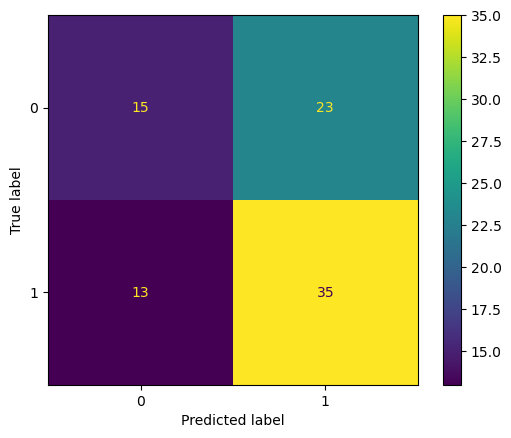

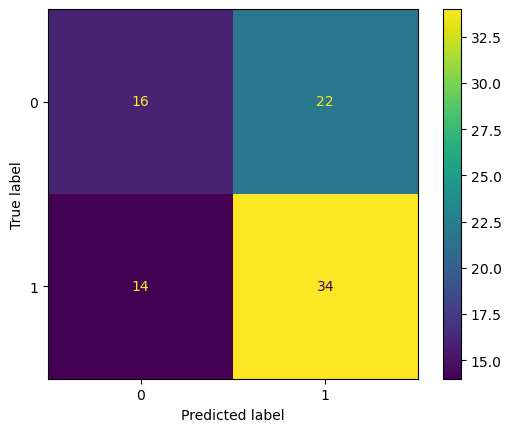

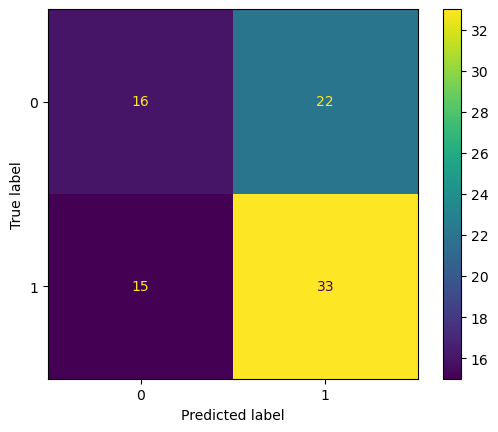

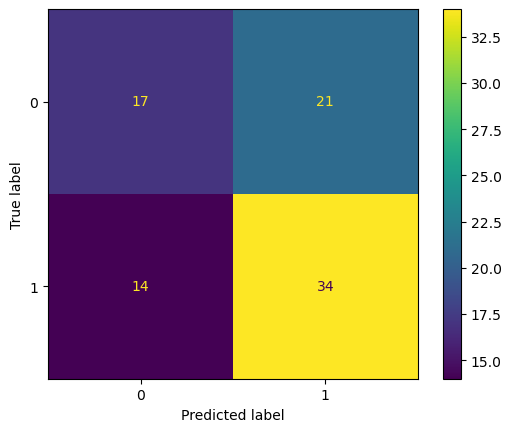

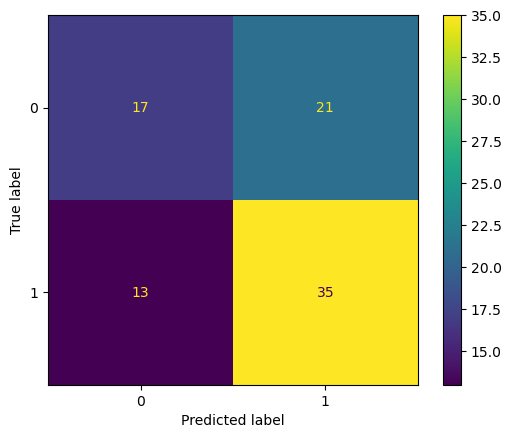

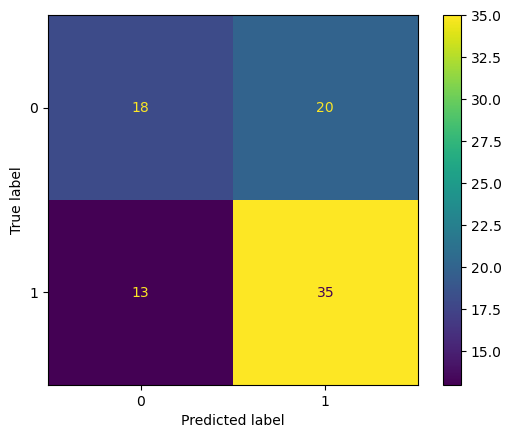

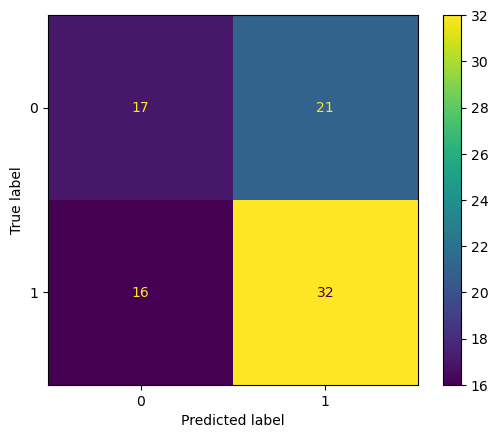

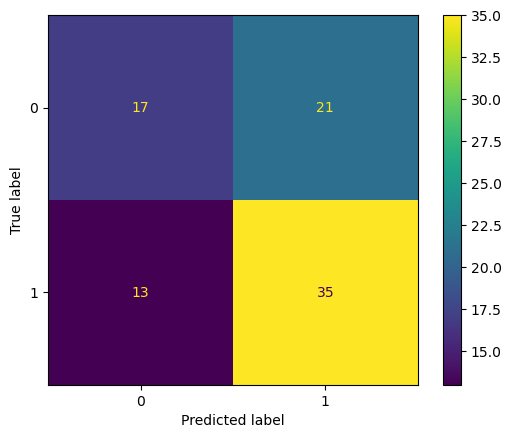

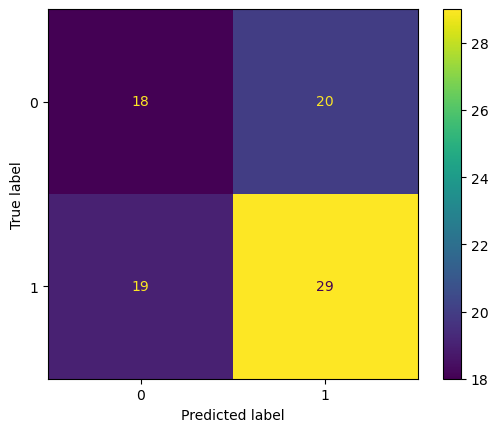

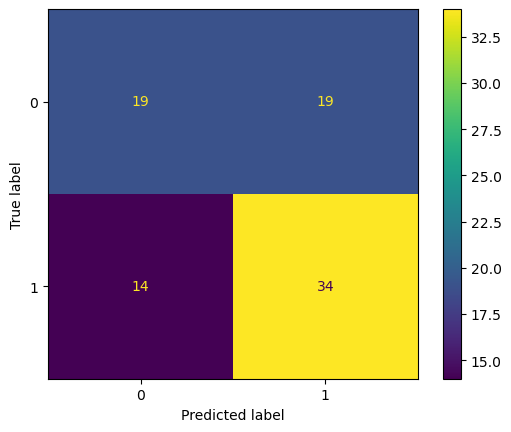

In [320]:
# Apply Models individually
p_ls_2 = []
r_ls_2 = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    X_ = np.array([np.array(list(x)) for x in df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)][embedding_+'_embedded_sequences']])
    # Y_ = np.array(df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: x <= 35))
    Y_ = np.array(df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)]['numeric_class'])
    
    
    print(len(X_),len(Y_))
    
    preds_score_ = clf_.predict_proba(X_)[:, 1]
    preds_binary_ = clf_.predict(X_)
    
    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve
    
    p_, r_, t_s = precision_recall_curve(Y_, preds_score_)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_, p_)
    
    p_ls_2.append(p_)
    r_ls_2.append(r_)
    
    from sklearn.metrics import f1_score
    fscore__ = f1_score(Y_, preds_binary_)  # , average=None)
    print('F1:',fscore__)
    
    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_ = fbeta_score(Y_, preds_binary_, beta=f_beta_)  # , average=None)
    # print("Computing fbeta_score with beta = "+str(f_beta_))
    print('Fbeta:',fbetascore_)
    
    from sklearn.metrics import accuracy_score
    accuracy_ = accuracy_score(Y_, preds_binary_)
    print('accuracy:',accuracy_)
    
    from sklearn.metrics import matthews_corrcoef
    mcc_ = matthews_corrcoef(Y_, preds_binary_)
    print('MCC:',mcc_)
    
    print('')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_, preds_binary_).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_, Y_)



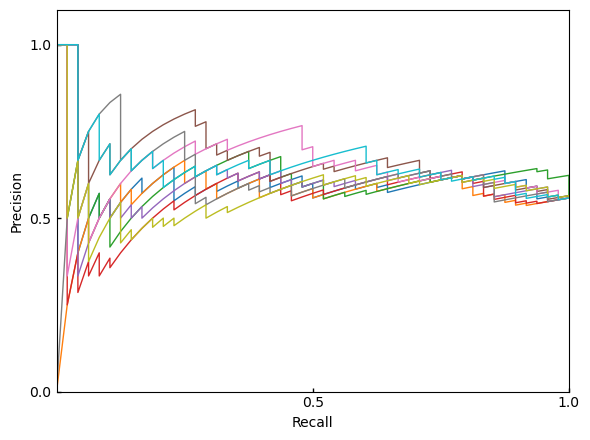

In [321]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

for i_ in range(len(p_ls)):
    ax.plot(
        r_ls_2[i_],  # r_OH,# x
        p_ls_2[i_],  # p_OH,# y
        lw=1,
        #color= 'blue',
    )



# Format Axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
# ax.set_xticks(ticks=np.arange(0, 1.1, .25), minor=True)
ax.tick_params(direction='in', which='both', length=3, width=1)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(ticks=[0.5, 1.0 ], labels=[0.5, 1.0])
ax.set_yticks(ticks=[0.0 , 0.5, 1.0 ], labels=[0.0, 0.5, 1.0])




## Add Legend
# legend_elements = [
#                 Line2D([0], [0],
#            color=testing_set_plot_color, # embd_color_dict[embd_][val__],
#            lw=4, label='Test Set'),
#     Line2D([0], [0],
#            color= external_set_plot_color,#color_,  # embd_color_dict[embd_][val__],
#            lw=4, label='External Dataset')
# ]
# ax.legend(handles=legend_elements, loc='upper left', frameon=False, bbox_to_anchor=(0, 1), title=self.parameter_to_optimize, title_fontsize=12, fontsize=12)
# ax.axis('off')


fig.tight_layout() 


## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fnm_ = 'p-r_curve_'+'ext_split_by_gene_'+'-'.join(model_file_.name.split('/')[0].split('_')[0:-1])
# fig.savefig(fnm_ + '.svg', format='svg', transparent=True)
# fig.savefig(fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t'+str(fnm_) + '.png')





In [322]:
preds_combined_by_screen_with_unlab

array([0.55218779, 0.52471595, 0.54550773, 0.51948152, 0.49147704,
       0.51935831, 0.43532369, 0.43701378, 0.43072886, 0.45008727,
       0.51950962, 0.52663323, 0.49345998, 0.48687942, 0.51134484,
       0.42892168, 0.54468744, 0.52238199, 0.45621002, 0.49865472,
       0.5111838 , 0.52281637, 0.52753722, 0.46829646, 0.50971256,
       0.45638045, 0.42591388, 0.51238869, 0.46267722, 0.53248931,
       0.51818539, 0.49180155, 0.50303671, 0.54356623, 0.53389991,
       0.5252744 , 0.5125527 , 0.52065014, 0.53654766, 0.5074869 ,
       0.54310938, 0.54715497, 0.52897361, 0.50114835, 0.53855508,
       0.48220551, 0.53036514, 0.48321223, 0.45341453, 0.5265295 ,
       0.50260818, 0.51979178, 0.51584022, 0.43646362, 0.42816154,
       0.40469003, 0.42915247, 0.43261787, 0.51214637, 0.53834328,
       0.42983411, 0.41644167, 0.52581415, 0.50413862, 0.4688714 ,
       0.54235375, 0.48526242, 0.52226823, 0.53133995, 0.53993667,
       0.53026163, 0.50448944, 0.46926967, 0.53348316, 0.53553

In [323]:
Y_combined_by_screen_with_unlab_

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25


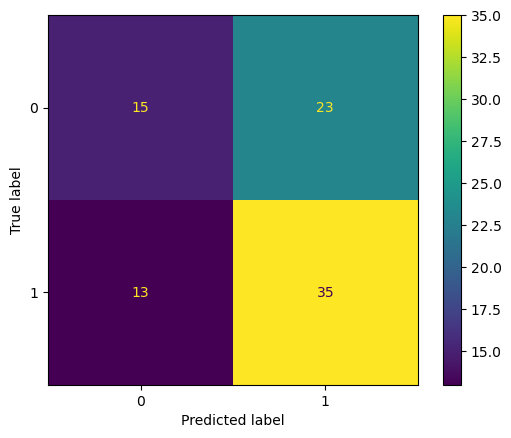

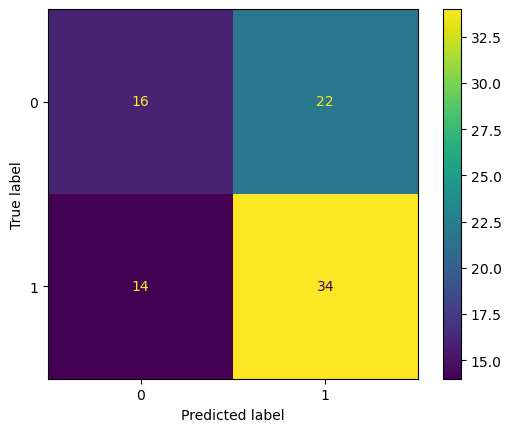

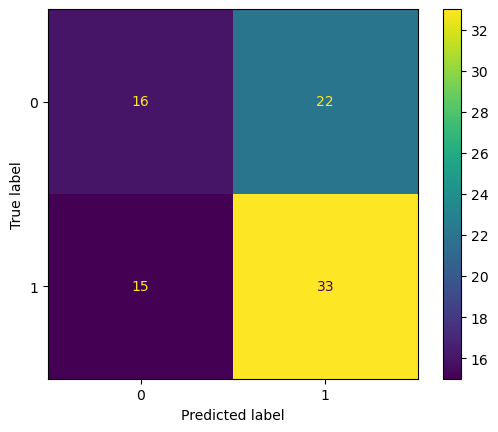

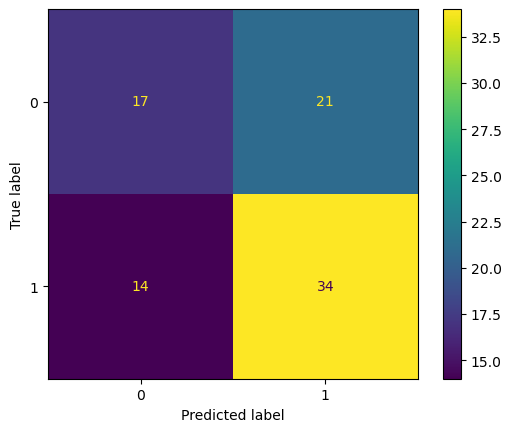

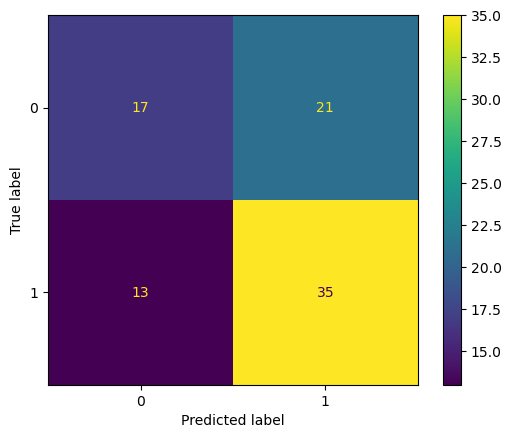

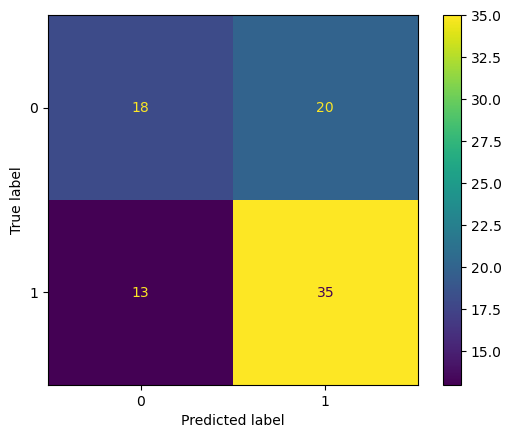

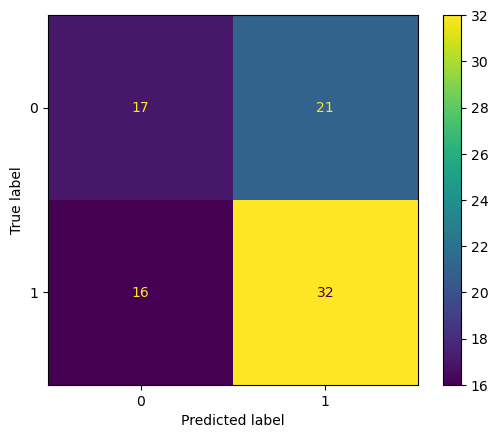

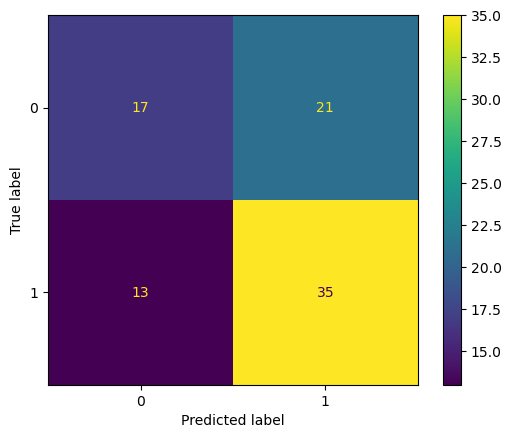

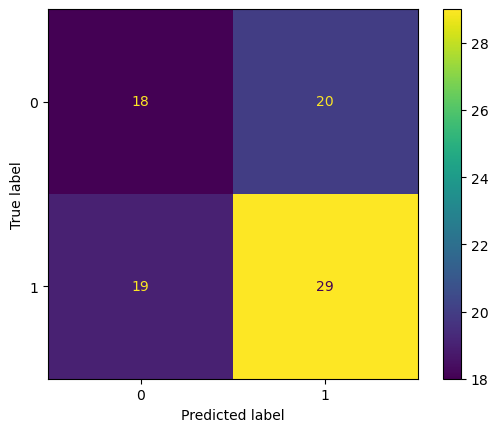

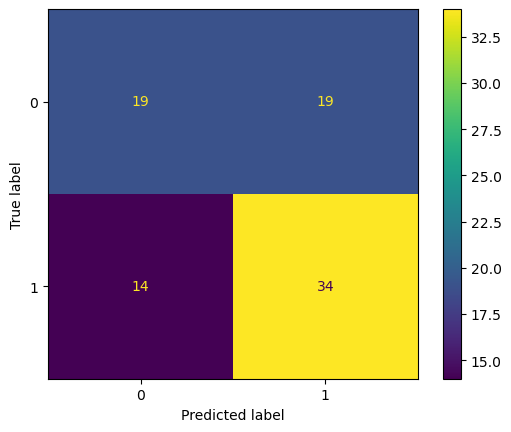

In [324]:
p_ls = []
r_ls = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    import numpy as np
    
    X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list( 
        df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            embedding_+'_embedded_sequences'])])
    
    Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]['numeric_class'])

    # X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'])])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab['numeric_class_no_undef'])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'])

    print(len(X_combined_by_screen_with_unlab_),len(Y_combined_by_screen_with_unlab_))

    preds_combined_by_screen_with_unlab = clf_.predict_proba(X_combined_by_screen_with_unlab_)[:, 1]
    preds_binary_combined_by_screen_with_unlab = clf_.predict(X_combined_by_screen_with_unlab_)

    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve

    p_combined_by_screen_with_unlab_, r_combined_by_screen_with_unlab_, ts_combined_by_screen_with_unlab_ = precision_recall_curve(Y_combined_by_screen_with_unlab_, preds_combined_by_screen_with_unlab)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_combined_by_screen_with_unlab_, p_combined_by_screen_with_unlab_)

    p_ls.append(p_combined_by_screen_with_unlab_)
    r_ls.append(r_combined_by_screen_with_unlab_)
    
    from sklearn.metrics import f1_score
    fscore_combined_by_screen_with_unlab_ = f1_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)  # , average=None)

    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_combined_by_screen_with_unlab_ = fbeta_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab, beta=f_beta_)  # , average=None)
    print("Computing fbeta_score with beta = "+str(f_beta_))

    from sklearn.metrics import accuracy_score
    accuracy_combined_by_screen_with_unlab_ = accuracy_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import matthews_corrcoef
    mcc_combined_by_screen_with_unlab_ = matthews_corrcoef(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_combined_by_screen_with_unlab_, Y_combined_by_screen_with_unlab_)


86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25
86 86
Computing fbeta_score with beta = 0.25


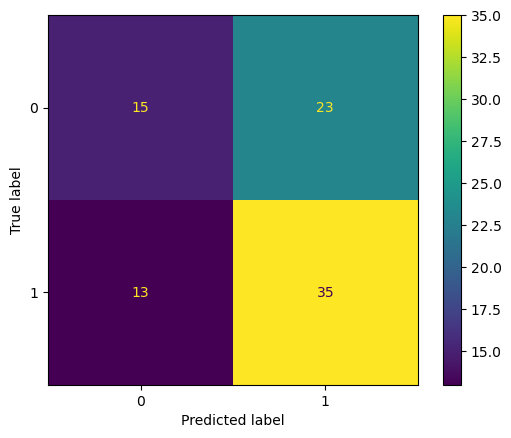

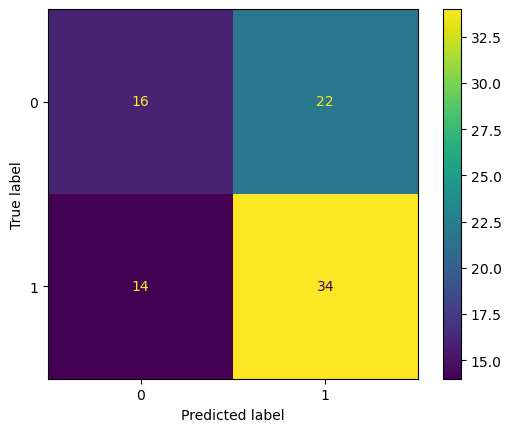

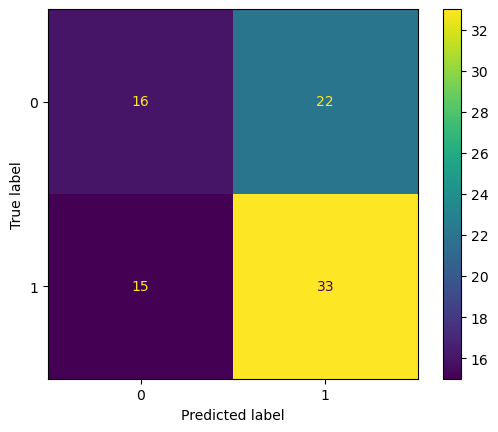

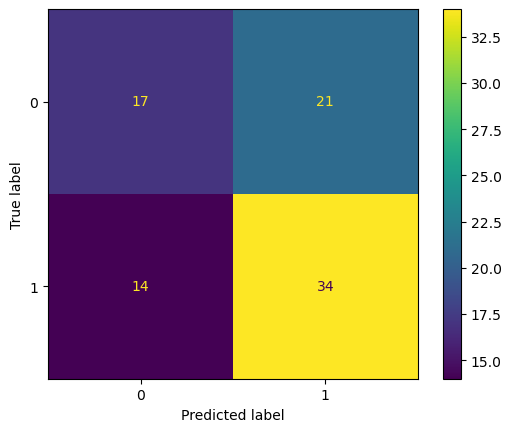

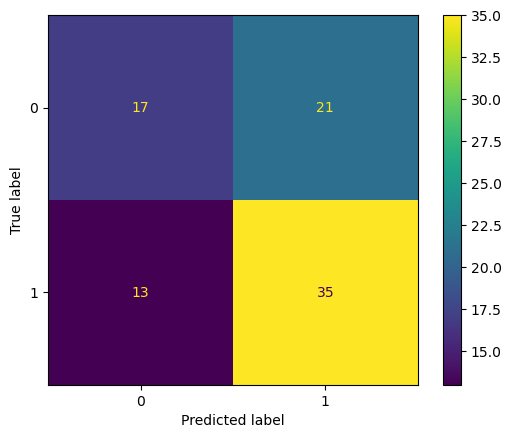

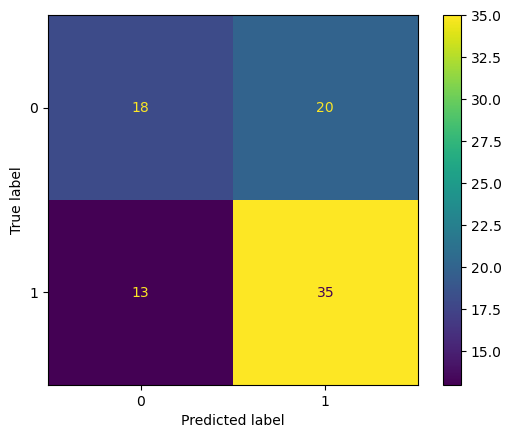

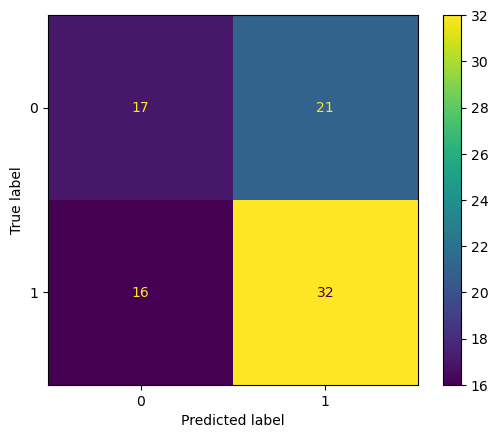

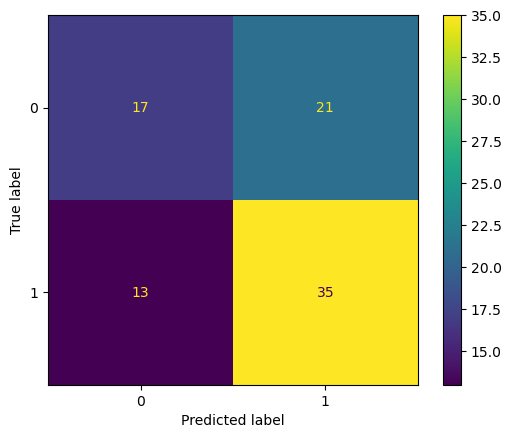

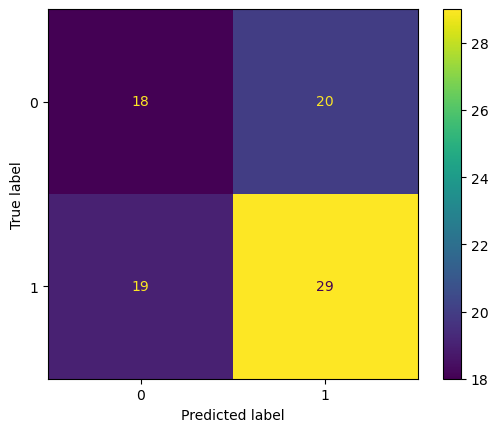

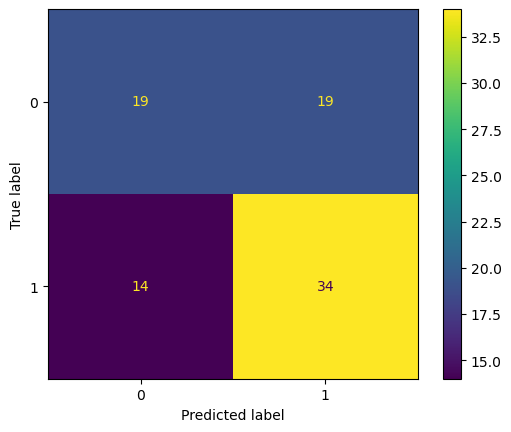

In [325]:
p_ls = []
r_ls = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    import numpy as np
    
    X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list( 
        df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            embedding_+'_embedded_sequences'])])
    
    Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]['numeric_class'])

    # X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'])])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab['numeric_class_no_undef'])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'])

    print(len(X_combined_by_screen_with_unlab_),len(Y_combined_by_screen_with_unlab_))

    preds_combined_by_screen_with_unlab = clf_.predict_proba(X_combined_by_screen_with_unlab_)[:, 1]
    preds_binary_combined_by_screen_with_unlab = clf_.predict(X_combined_by_screen_with_unlab_)

    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve

    p_combined_by_screen_with_unlab_, r_combined_by_screen_with_unlab_, ts_combined_by_screen_with_unlab_ = precision_recall_curve(Y_combined_by_screen_with_unlab_, preds_combined_by_screen_with_unlab)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_combined_by_screen_with_unlab_, p_combined_by_screen_with_unlab_)

    p_ls.append(p_combined_by_screen_with_unlab_)
    r_ls.append(r_combined_by_screen_with_unlab_)
    
    from sklearn.metrics import f1_score
    fscore_combined_by_screen_with_unlab_ = f1_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)  # , average=None)

    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_combined_by_screen_with_unlab_ = fbeta_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab, beta=f_beta_)  # , average=None)
    print("Computing fbeta_score with beta = "+str(f_beta_))

    from sklearn.metrics import accuracy_score
    accuracy_combined_by_screen_with_unlab_ = accuracy_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import matthews_corrcoef
    mcc_combined_by_screen_with_unlab_ = matthews_corrcoef(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_combined_by_screen_with_unlab_, Y_combined_by_screen_with_unlab_)


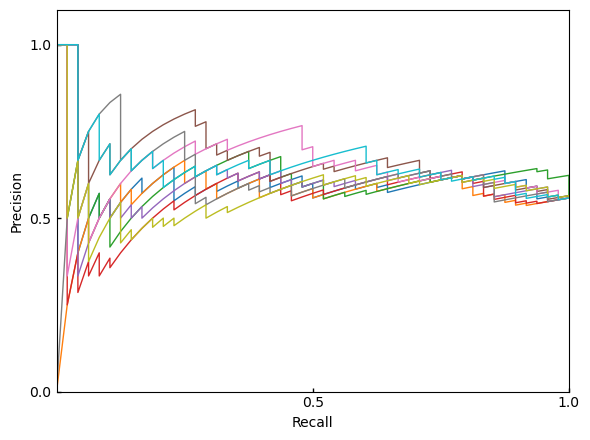

In [326]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

for i_ in range(len(p_ls)):
    ax.plot(
        r_ls[i_],  # r_OH,# x
        p_ls[i_],  # p_OH,# y
        lw=1,
        #color= 'blue',
    )



# Format Axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
# ax.set_xticks(ticks=np.arange(0, 1.1, .25), minor=True)
ax.tick_params(direction='in', which='both', length=3, width=1)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(ticks=[0.5, 1.0 ], labels=[0.5, 1.0])
ax.set_yticks(ticks=[0.0 , 0.5, 1.0 ], labels=[0.0, 0.5, 1.0])




## Add Legend
# legend_elements = [
#                 Line2D([0], [0],
#            color=testing_set_plot_color, # embd_color_dict[embd_][val__],
#            lw=4, label='Test Set'),
#     Line2D([0], [0],
#            color= external_set_plot_color,#color_,  # embd_color_dict[embd_][val__],
#            lw=4, label='External Dataset')
# ]
# ax.legend(handles=legend_elements, loc='upper left', frameon=False, bbox_to_anchor=(0, 1), title=self.parameter_to_optimize, title_fontsize=12, fontsize=12)
# ax.axis('off')


fig.tight_layout() 


## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fnm_ = 'p-r_curve_'+'ext_split_by_gene_'+'-'.join(model_file_.name.split('/')[0].split('_')[0:-1])
# fig.savefig(fnm_ + '.svg', format='svg', transparent=True)
# fig.savefig(fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t'+str(fnm_) + '.png')





# Re-Running excluding undefined middle region

### Go to: [1) Running Excluding Undefined (middle) Region](#Running-excluding-undefined-middle-region)
#### [top](#top) | [bottom](#bottom)

### Load in pre-Trained Semi-supervised Models

In [328]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')
import glob 
model_file_ls = glob.glob('output_model_fitting/popt-ssrfN56559*/models/*.pickle')



print("Total trained models:",len(model_file_ls))



Total trained models: 20


In [329]:
feature_encodings_dict = {
    'one-hot':'oh',
    'bow-countvect':'bowcv',
    'bow-gensim':'bowgen',
    'bow-gensim-weights':'bowgenw',
    'ann-keras':'annk',
    'ann-word2vec-gensim':'w2v',
    'ann-word2vec-gensim-cbow':'w2vcbow',
    'ann-word2vec-gensim-skipgram':'w2vsg',
    'ann-fasttext-cbow':'annftxcbow',
    'ann-fasttext-skipgram':'annftxsg',
    'ann-fasttext-class-trained':'annftlab',
    'glove':'glv',
    'glove-one-line':'glvol',

}


rev_feature_encodings_dict ={
    'oh' : 'one-hot',
    'bowcv' : 'bow-countvect',
    'bowgen' : 'bow-gensim',
    'bowgenw' : 'bow-gensim-weights',
    'annk' : 'ann-keras',
    'w2v' : 'ann-word2vec-gensim',
    'w2vcbow' : 'ann-word2vec-gensim-cbow',
    'w2vsg' : 'ann-word2vec-gensim-skipgram',
    'annftxcbow' : 'ann-fasttext-cbow',
    'annftxsg' : 'ann-fasttext-skipgram',
    'annftlab' : 'ann-fasttext-class-trained',
    'glv' : 'glove',
    'glvol' : 'glove-one-line',
}

feature_encodings_titles_dict = {
    'one-hot':                          'One-Hot',
    'bow-gensim-weights':               'Bag-of-Words',
    'ann-word2vec-gensim-cbow':         'Word2Vec CBOW',
    'ann-word2vec-gensim-skipgram':     'Word2Vec Skip-Gram',
    'ann-fasttext-cbow':                'Fast-Text CBOW',
    'ann-fasttext-skipgram':            'Fast-Text Skip-Gram',
    'ann-fasttext-class-trained':       'Fast-Text CBOW class-trained',
    'glove':                            'GloVe',
    'glove-one-line':                   'GloVe one Corpus',
}

# To reverse:
# for k in list(feature_encodings_dict.keys()):
#     print("'"+feature_encodings_dict[k]+"'"+" : "+"'"+k+"',")
#     
# for k in list(feature_encodings_titles_dict.keys()):
#     print("'"+feature_encodings_titles_dict[k]+"'"+" : "+"'"+k+"',")
    

In [330]:
model_type_dict = {}
model_file_dict = {}

# [feature_encodings_titles_dict[rev_feature_encodings_dict[
#     x.split('_model_')[-1].replace('.pickle','').split('_')[-1]]]
#  for x in model_file_ls]

for x in model_file_ls:
    
    enc_ = feature_encodings_titles_dict[ rev_feature_encodings_dict[
            x.split('_model_')[-1].replace('.pickle','').split('_')[-1]]]
    
    model_type_dict[x] = enc_
    
    try:
        model_file_dict[enc_].append(x)
    except:
        model_file_dict[enc_] = [x]
    

# model_file_dict['Word2Vec Skip-Gram'][0]


# Load in Data and embed it

In [331]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
import os


df_combined_by_screen  = pd.read_csv('new_input_data/'+'FOR-SSRF-MODEL-TRAINING-EVAL_new_screen_model_evaluation_round_2_FEB-14-2025.csv')
df_combined_by_screen['dataset'] = len(df_combined_by_screen)*['external']
df_combined_by_screen

,oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,...,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class,dataset
0,BCAM1_139,BCAM1,NaN,139,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
1,BCAM1_140,BCAM1,NaN,140,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
2,BCAM1_370,BCAM1,NaN,370,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
3,BCAM1_666,BCAM1,NaN,666,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
4,BCAM1_709,BCAM1,NaN,709,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MSH3_4010,MSH3,NaN,4010,XR_931597;XM_017006081;NM_001286793;NM_0012867...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
116,MSH3_4035,MSH3,NaN,4035,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
117,MSH3_4036,MSH3,NaN,4036,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
118,MSH3_4068,MSH3,NaN,4068,NM_002439,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external


# Embed Data 

In [332]:
## Embedding Helper Methods

# helper functions

# helper functions
def get_kmers_(seq__, kmer_size__, window_size__):
    """ Returns kmers for a SINGLE sequence """
    kmers_ = [''.join(seq__[i:kmer_size__+i]) for i in range(len(seq__)-kmer_size__+window_size__)[::window_size__]]
    kmers_ = [x for x in kmers_ if x != '']
    return kmers_

## Testing:
## get_kmers_('TTCAAAAATAGTGACTCAGAAAAGGACAATTCAAAAAGGACATTAC',kmer_size__ = 6,window_size__ = 1)

def pad_list_(list_, ref_len_):
    # Create an array of zeros with the reference shape
    to_pad_ = ref_len_-len(list_)
    return list_+[0]*to_pad_

def pad_corpus_(list_, ref_len_):
    # Create an array of zeros with the reference shape
    to_pad_ = ref_len_-len(list_)
    return list_+['']*to_pad_

## Helper Methods


# Function Definitions
def classify(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 'efficient'
    elif expr>=ineff_co:
        return 'inefficient'
    else:
        return 'undefined'

# Function Definitions
def classify_numeric(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 1
    elif expr>=ineff_co:
        return 0
    else:
        return -1
    
def classify_no_undefined(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 'efficient'
    elif expr>=ineff_co:
        return 'inefficient'
    else:
        return 'inefficient'
    
def classify_numeric_no_undefined(expr,eff_co,ineff_co):
    if expr<eff_co:
        return 1
    elif expr>=ineff_co:
        return 0
    else:
        return 0

# def get_flank_by_substring(long, short, includes_target_region, flank_len):
#     try:
#         indx = long.replace('T','U').index(short.replace('T','U'))
#         if includes_target_region:
#             return long[((indx-3)-flank_len):((indx-3)+20+flank_len)]
#         else:
#             return long[((indx-3)-flank_len):(indx-3)] + 'X'*20 + long[((indx-3)+20):((indx-3)+20+flank_len)]
#     except:
#         #return False
#         return np.nan

def get_kmers(seq__, kmer_size__, window_size__):
    """ Returns kmers for a SINGLE sequence """
    return [''.join(seq__[i:kmer_size__+i]) for i in range(len(seq__)-kmer_size__+window_size__)]
## Testing:
## get_kmers('TTCAAAAATAGTGACTCAGAAAAGGACAATTCAAAAAGGACATTAC',kmer_size__ = 6,window_size__ = 1)


def one_hot(seq):
    one_hot_dict = {'A':[1,0,0,0],
                'U':[0,1,0,0],'T':[0,1,0,0],
                'C':[0,0,1,0],
                'G':[0,0,0,1],
                'X':[0,0,0,0]
               }
    return np.array([item for sublist in [one_hot_dict[x] for x in list(seq)] for item in sublist]) # flatten
## Testing:
## df['one-hot_encoded_flanking_sequence'] = df[flank_seq_working_key].apply(lambda x: one_hot(str(x)))


def get_20mer_sequence(seq_16mer, flank_seq):
    ix_ = flank_seq.index(seq_16mer)
    ## Get 20mer:
    return flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
    
def get_flanking_sequence(seq_16mer, flank_seq, flank_len, include_20mer = True):
    # Uses 16mer "homology region" to find the 20mer
    import numpy as np
    seq_16mer = seq_16mer.replace('U','T')
    flank_seq = flank_seq.replace('U','T')
    try:
        ix_ = flank_seq.index(seq_16mer)
        
        # NOTE: this code gets just the 20mer --> flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
        
        ## Get flanks with 20mer:
        if include_20mer:
            try:
                final_seq = flank_seq[ (ix_ - 3) - flank_len : ( ix_ + 16 + 1 )+ flank_len ] # based off 20mer
                if len(final_seq) != (flank_len*2) + 20 :
                    print("WARNING: final sequence did not match expected ("+str((flank_seq*2) + 20)+"nt) length for 16mer:",seq_16mer)
                return final_seq
            except:
                #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer)
                return ''#np.nan
        ## Get flanks WITHOUT 20mer :
        else:
            try: #UPDATE: 0CT-5-2023 Removed 'XXXXXXXXXXXXXXXXXXXX' from 20mer in cases where flanks only (hurts performance of methods that use kmers - possibly because using X's and finding other sequences were similar?)
                #final_seq = flank_seq[ (ix_ - 3 ) - flank_len : ix_ - 3 ] + 'X'*20 + flank_seq[ ix_ + 16 + 1 : (ix_ + 16 + 1) + flank_len ]# based off 20mer
                #if len(final_seq) !=  (flank_len*2) + 20 :
                final_seq = flank_seq[ (ix_ - 3 ) - flank_len : ix_ - 3 ] + flank_seq[ ix_ + 16 + 1 : (ix_ + 16 + 1) + flank_len ]# based off 20mer
                if len(final_seq) !=  (flank_len*2):# + 20 :
                    print("WARNING: final sequence did not match expected ("+str((flank_seq*2) + 20)+"nt) length for 16mer:",seq_16mer)
                return final_seq
            except:
                #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer)
                return ''#np.nan
    # 16mer not found in flanking sequence 
    except: 
        #print("WARNING: could not get flanking sequence for 16mer:",seq_16mer,'(16mer not found in flanking sequence)')
        return ''#np.nan


def get_20mer_from_16mer(seq_16mer, flank_seq, seq_20mer_from_dataset, mismatch_to_flank ):
    # Uses 16mer "homology region" to find the 20mer
    import numpy as np
    # First check that 16mer can be used to find the 20mer, if not try returning given 20mer from starting dataset (NOTE: this is not done in find flanking region methods because 20mers are defined while flanking regions often are not -- i.e. finding flanks with cross-species reactive siRNAs where there might not be a perfect 20mer match)
    if mismatch_to_flank != '16mer perfect match to target':
        if type(seq_20mer_from_dataset) == str:
            if len(seq_20mer_from_dataset) == 20:
                return seq_20mer_from_dataset
        else:
            #print("WARNING: when calling get_20mer_from_16mer() for 16mer ( "+str(seq_16mer)+" ) there was a mismatch_to_flank  so could not compute 20mer with get_20mer_from_16mer(), but '20mer_targeting_region' from starting dataset was: "+str(seq_20mer_from_dataset))
            return np.nan
    else:
        seq_16mer = seq_16mer.replace('U', 'T')
        flank_seq = flank_seq.replace('U', 'T')
        flank_len = 0 # since getting just the 20mer
        try:
            ix_ = flank_seq.index(seq_16mer)
            # NOTE: this code gets just the 20mer --> flank_seq[ ix_ - 3 : (ix_ + 16 + 1) ]
            try:
                final_seq = flank_seq[(ix_ - 3) - flank_len: (ix_ + 16 + 1) + flank_len]  # based off 20mer
                if len(final_seq) != 20:
                    #print("WARNING: when calling get_20mer_from_16mer() final sequence did not match expected (20nt) length for 16mer:", seq_16mer)
                    return np.nan
                return final_seq
            except:
                #print("WARNING: when calling get_20mer_from_16mer() could not get 20mer sequence for 16mer:", seq_16mer)
                return np.nan
        # 16mer not found in flanking sequence
        except:
            #print("WARNING:when calling get_20mer_from_16mer() could not get 20mer sequence for 16mer:", seq_16mer, '(16mer not found in flanking sequence)')
            return np.nan
    
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

# print(rgb_to_hex(255, 165, 1))

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    import seaborn as sns
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    rgb = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    rgb = [round(x*256) for x in list(rgb)]
    
    return rgb_to_hex(rgb[0],rgb[1],rgb[2])
    #'#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def make_gradient_color_scheme(size,color_ls,plot_pal=True):
    '''
    Output list of hex colors for color scheme also displays a plot of the color pallette 
    Inputs:
        size = number of colors in color scheme
        color_ls = list of colors to be used in making gradient
            * can be any length < size
            * if only one color is given other color in gradient will be set to white)
        plot_pal = boolean if True will plot a palplot
    '''
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    norm = matplotlib.colors.Normalize(-1,1)
    
    if len(color_ls) == 1:
        color_ls.append("#ffffff")
    grad_cols = [[norm(-1.0), color_ls[0]] ] # first already determined
    if len(color_ls)>len(grad_cols)-1:
        i=1
        while i<len(color_ls)-1: 
            grad_cols.append([norm( i*(2/(len(color_ls)-1))+(-1)), color_ls[i]])
            i+=1
    grad_cols.append([norm(1.0), color_ls[-1]]) # last already determined
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_cols)
    hex_cols = []
    for i in range(cmap.N): 
        if i%int(cmap.N/size)==0: # cmp1.N is 256 
            rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
            hex_cols.append(matplotlib.colors.rgb2hex(rgb))
    
    if plot_pal:
        sns.palplot(hex_cols)
        print(hex_cols)
    return(hex_cols)    
    
# # Testing:
# # s16_ = 'GGAAGAATCTATATGT' 
# # sflank_ = 'ACAATCTAGGCAAGGAAGTGAGAGCACATCTTGTGGTCTGCTGAGTTAGGAGGGTATGATTAAAAGGTAAAGTCTTATTTCCTAACAGTTTCACTTAATATTTACGGAAGAATCTATATGTAGCCTTTGTAAAGTGTAGGATTGTTATCATTTAAAAACATCATGTACACTTATATTTGTATTGTATACTTGGTAAGATAAAATTCCACAAAGTAGGAATGGGGCC' 
# i_ = 20
# flen_ = 10
# sflank_ = df.iloc[i_]['flanking_sequence_1']
# s16_ = df.iloc[i_]['16mer_complementary_region']
# print(s16_)
# print(df.iloc[i_]['20mer_targeting_region'].replace('U',"T"))

# print(get_flanking_sequence(s16_, sflank_, flen_, False))
# print(get_flanking_sequence(s16_, sflank_, flen_, True))

def embed_sequences_with_gensim_word2vec_cbow(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    ''' NEW UPDATED WORD2VEC METHOD'''
    ## UPDATED to use Word2Vec correctly - using CBOW (Continuous Bag Of Words): Using the context to predict a target word
    ## https://michael-fuchs-python.netlify.app/2021/09/01/nlp-word-embedding-with-gensim-for-text-classification/#gensim---word2vec
    from gensim.models import Word2Vec

    vector_size_n_w2v = 120 # TODO: update to something higher(?) 100?

    w2v_model = Word2Vec(vector_size=vector_size_n_w2v,
                         window=5, # number of words to consider on each side for the context TODO: update to larger value?
                         min_count=word_freq_cutoff_,
                         sg=0 ) # 0=CBOW, 1=Skip-gram

    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    w2v_model.build_vocab(texts_sirna) # Create the vocabulary, which is to be learned by Word2Vec
    ##**#print(w2v_model)

    w2v_model.train(texts_sirna, # Train Neural Network over 5 epochs (NOTE: this can take some time)
                    total_examples=w2v_model.corpus_count,
                    epochs=50) # TODO: update epochs?

    # Save to Word2Vec Model (and the vector size
    w2v_model.save("embedding_dictionaries/word2vec_model")
    import pickle as pk
    pk.dump(vector_size_n_w2v, open('embedding_dictionaries/vector_size_w2v_metric.pkl', 'wb'))

    # # EXAMPLE: Output of the calculated vector for a given word (kmer) from the vocabulary:
    # single_example_kmer__ = texts_sirna[0][0]
    # w2v_model.wv[single_example_kmer__]
    # # EXAMPLE: Display the words that are most similar to a given word from the vocabulary:
    # w2v_model.wv.most_similar(single_example_kmer__)

    # Generate aggregate sentence vectors based on the kmer vectors for each kmer in the given sequence
    words = set(w2v_model.wv.index_to_key)
    import numpy as np
    text_vect_ls = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                                for ls in texts_sirna ])

    # NOTE: since specify vector initially no need to pad them (since all same length)
    # Generation of averaged Sentence Vectors
    text_vect_avg = []
    for v in text_vect_ls:
        if v.size:
            text_vect_avg.append(list(v.mean(axis=0)))
        else:
            text_vect_avg.append(list(np.zeros(vector_size_n_w2v, dtype=float))) # the same vector size must be used here as for model training

    # TODO: for troubleshotting (delete later)
    # #**#print("\n\n\n\n\n\n**********************************  WORD2VEC-NEW  ***************************************\n\n")
    # for t in text_vect_avg[0:10]:
    #     #**#print(t)
    # #**#print("\n\n**********************************  WORD2VEC-NEW  ***************************************\n\n\n\n\n")
    # NOTE: could move forward and train model based on siRNA efficacy, but not doing that here (just using word2vec to represent/embed data)

    return text_vect_avg

# Darken Hex Colors
# Need to have installed:
# pip install colormap
# pip install easydev

    


#### Note Efficacy cutoff (`effco__`) was increased for evaluation of experimental data from 25% to 35%


In [333]:
embedding_ = 'GloVe'#word2vec_skip-gram'

kmer_size___ =9
flank_len___ =20
window_size___ =1 
word_freq_cutoff___ =1


normalized___ = True
effco___ = 35
ineffco___ = 60
# remove_undefined___ =True




# Prepare sequences for embedding

In [334]:
import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
import os

df_combined_by_screen_with_unlab = df_combined_by_screen.copy()
df_combined_by_screen_with_unlab.reset_index(inplace=True,drop=True)

display(df_combined_by_screen_with_unlab['dataset'].value_counts())

display(df_combined_by_screen_with_unlab.head())

print(len(df_combined_by_screen_with_unlab))


external    120
Name: dataset, dtype: int64

,oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,...,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class,dataset
0,BCAM1_139,BCAM1,NaN,139,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
1,BCAM1_140,BCAM1,NaN,140,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
2,BCAM1_370,BCAM1,NaN,370,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
3,BCAM1_666,BCAM1,NaN,666,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external
4,BCAM1_709,BCAM1,NaN,709,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,external


120


In [335]:
df_combined_by_screen_with_unlab['seqs_to_embed'] = df_combined_by_screen_with_unlab.apply(
    lambda x: get_flanking_sequence(seq_16mer = x['16mer_complementary_region'], 
     flank_seq = x['flanking_sequence_1'], 
     flank_len = flank_len___, 
     include_20mer = True), axis = 1)


len_before_ = len(df_combined_by_screen_with_unlab)
df_combined_by_screen_with_unlab.drop(index=list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['seqs_to_embed'].isna()].index),inplace=True)
df_combined_by_screen_with_unlab.reset_index(inplace=True,drop=True)
print("Dropped "+str(len_before_-len(df_combined_by_screen_with_unlab))+" siRNAs because could not get 20mer + flanking region sequences.\n Number of siRNAs remaining:",len(df_combined_by_screen_with_unlab))

display(df_combined_by_screen_with_unlab['seqs_to_embed'].head())



Dropped 0 siRNAs because could not get 20mer + flanking region sequences.
 Number of siRNAs remaining: 120


0    GTGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGT...
1    TGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTC...
2    CTGGTGCTGGCTGAGGCCCAGGTGGGCGACGAGCGAGACTACGTGT...
3    GGTCCGGGAGGCCTCGGGCCTGCTCTCCCTCACCAGCACCCTCTAC...
4    TACCTGCGGCTCCGCAAGGATGACCGAGACGCCAGCTTCCACTGCG...
Name: seqs_to_embed, dtype: object

In [336]:
embedding_

'GloVe'

# Embed Sequence Data
#### (will take some time to run)

In [337]:
## EMBED SEQUENCES
# embedding_ = 'GloVe'
# embedding_ = 'glove_one_corpus'
# 'glv-4QOZBR'
# def embed_sequences_all_embeddings(embedding_)

# seq_ls
from embedding_methods import one_hot_encode_sequences

# seq_ls, kmer_size_, window_size_, word_freq_cutoff_
from embedding_methods import embed_sequences_with_gensim_word2vec

from embedding_methods import embed_sequences_with_gensim_word2vec_cbow
from embedding_methods import embed_sequences_with_gensim_word2vec_skipgram
from embedding_methods import embed_sequences_with_fasttext_cbow
from embedding_methods import embed_sequences_with_fasttext_skipgram

from embedding_methods import embed_sequences_with_glove
from embedding_methods import embed_sequences_with_glove_one_line



if embedding_ == 'one-hot':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = one_hot_encode_sequences(list(df_combined_by_screen_with_unlab['seqs_to_embed']))

elif embedding_ == 'bag-of-words':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'word2vec_cbow':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec_cbow(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'word2vec_skip-gram':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_gensim_word2vec_skipgram(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'fasttext_cbow':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_fasttext_cbow(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'fasttext_skip-gram':
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_fasttext_skipgram(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'GloVe':
    #df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_glove(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = load_glove_embeddings(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

elif embedding_ == 'glove_one_corpus':
    #df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = embed_sequences_with_glove_one_line(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)
    df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'] = load_glove_one_line_embeddings(list(df_combined_by_screen_with_unlab['seqs_to_embed']), kmer_size_=kmer_size___, window_size_=window_size___, word_freq_cutoff_=word_freq_cutoff___)

display(df_combined_by_screen_with_unlab[embedding_+'_embedded_sequences'].head())



0    [-0.257116, 0.293686, -0.173462, -0.110009, 0....
1    [0.178455, 0.513538, -0.000838, 0.193115, 0.03...
2    [0.053905, 0.646998, 0.146936, -1.699004, 0.54...
3    [-0.021651, 0.66886, -0.980711, 0.013622, -0.3...
4    [0.327192, 0.488377, 0.560764, 0.676814, 0.685...
Name: GloVe_embedded_sequences, dtype: object

In [338]:
df_combined_by_screen_with_unlab['dataset'].value_counts()

external    120
Name: dataset, dtype: int64

In [350]:
remove_undefined_ = False
# Classify data (set undefined to 0 or inefficient)

indxs_selected_dataset_ = list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['dataset'] == 
                                    'external'].index)
len(indxs_selected_dataset_)


if remove_undefined_:
    print("NOTE: EXCLUDING UNDEFINED DATA!\n\t REMOVE UNDEFINED SET TO :",remove_undefined_)
    df_combined_by_screen_with_unlab['numeric_class'] = df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: classify_numeric(x, effco___, ineffco___))
    indxs_to_include_combined_by_screen_with_unlab_ = list(df_combined_by_screen_with_unlab[df_combined_by_screen_with_unlab['numeric_class'] != -1].index)
    indxs_to_include_combined_by_screen_with_unlab_ = [x for x in indxs_to_include_combined_by_screen_with_unlab_ if x in indxs_selected_dataset_]
    print("\tNumber of siRNAs included (not undefined):",len(indxs_to_include_combined_by_screen_with_unlab_))
    display(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts())

else:
    print("NOTE: INCLUDING UNDEFINED DATA!\n\t  REMOVE UNDEFINED SET TO :",remove_undefined_)
    df_combined_by_screen_with_unlab['numeric_class'] = df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: classify_numeric_no_undefined(x, effco___, ineffco___))
    indxs_to_include_combined_by_screen_with_unlab_ = list(df_combined_by_screen_with_unlab.index)
    # indxs_to_include_combined_by_screen_with_unlab_ = [x for x in indxs_to_include_combined_by_screen_with_unlab_ if x in indxs_selected_dataset_]
    display(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts())

print('length indxs_to_include_combined_by_screen_with_unlab_:',len(indxs_to_include_combined_by_screen_with_unlab_))



NOTE: INCLUDING UNDEFINED DATA!
	  REMOVE UNDEFINED SET TO : False


0    72
1    48
Name: numeric_class, dtype: int64

length indxs_to_include_combined_by_screen_with_unlab_: 120


In [351]:
len(df_combined_by_screen_with_unlab)

120

In [352]:
len(indxs_to_include_combined_by_screen_with_unlab_) 

120

In [353]:
def load_glove_one_line_embeddings(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    '''Uses Global GloVe embeddings that were pre-trained see Jupyter notebook:
        data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/jupyter_notebooks/training_GloVe_embeddings.ipynb

    '''
    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    corpus_file_name_to_load = 'glove/' + 'kmer-' + str(kmer_size_) + '_windw-' + str(window_size_) + '_wfco-' + str(word_freq_cutoff_) + '_glove_corpus_sirnas-as-docs'

    import os
    curdir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization'
    os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/glove')

    # Load in vectors from GloVe fittings
    vectors_file_name = corpus_file_name_to_load.replace('glove/', '') + '_vectors.txt'
    with open(vectors_file_name, 'r+') as f:
        data_ = [x.replace('\n', '') for x in f.readlines()]
    f.close()

    vector_dict_ = {}
    for x in data_:
        vector_dict_[x.split(' ')[0]] = [float(y) for y in x.split(' ')[1:]]

    vect_len_ = len(vector_dict_[list(vector_dict_.keys())[0]])
    # use dictionary of vector values to produce list of embedded data to return
    vects_sirna_ = []
    for t in texts_sirna:
        concat_sirna_target_vector_ = []
        # loops through each kmer in siRNA
        for k in t:
            try:
                concat_sirna_target_vector_ += vector_dict_[k]
            except:
                concat_sirna_target_vector_ += [np.nan]# [0.0] * vect_len_
        vects_sirna_.append(concat_sirna_target_vector_)

    os.chdir(curdir_)
    return vects_sirna_



In [354]:
def load_glove_embeddings(seq_ls, kmer_size_, window_size_, word_freq_cutoff_):
    '''Uses Global GloVe embeddings that were pre-trained see Jupyter notebook:
        data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/jupyter_notebooks/training_GloVe_embeddings.ipynb

    '''
    texts_sirna = [get_kmers_(x, kmer_size_, window_size_) for x in seq_ls]

    # Generate corpus with each word (kmer) separated by a space and each document (sirna) separated by a newline
    #corpus_file_name_to_load = 'glove/' + 'kmer-' + str(kmer_size_) + '_windw-' + str(window_size_) + '_wfco-' + str(word_freq_cutoff_) + '_glove_corpus_sirnas-as-docs'

    # with open(corpus_file_name+'.txt', 'w+') as f:
    #     ct_ = 0
    #     for si_ in texts_sirna:
    #         f.write(' '.join(si_) + '\n')
    #         ct_ += 1
    #f.close()
    # print('Sequence data for ' + str(ct_) + ' siRNAs saved to:\n\t', corpus_file_name.split('/')[-1])

    # Load GloVe Fittings
    import os
    curdir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization'
    os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization/glove')

    
    # Load in vectors from GloVe fittings
    #vectors_file_name = corpus_file_name_to_load.replace('glove/', '') + '_vectors.txt'
    import glob
    vectors_file_name = glob.glob('glv-4QOZBR*_vectors.txt')[0]

    with open(vectors_file_name, 'r+') as f:
        data_ = [x.replace('\n', '') for x in f.readlines()]
    f.close()

    vector_dict_ = {}
    for x in data_:
        vector_dict_[x.split(' ')[0]] = [float(y) for y in x.split(' ')[1:]]

    vect_len_ = len(vector_dict_[list(vector_dict_.keys())[0]])
    # use dictionary of vector values to produce list of embedded data to return
    vects_sirna_ = []
    for t in texts_sirna:
        concat_sirna_target_vector_ = []
        # loops through each kmer in siRNA
        for k in t:
            try:
                concat_sirna_target_vector_ += vector_dict_[k]
            except:
                concat_sirna_target_vector_ += [0.0] * vect_len_
        vects_sirna_.append(concat_sirna_target_vector_)

    os.chdir(curdir_)
    return vects_sirna_



# Apply pre-trained model to predict efficacies
## Load in picked model

In [355]:
# model_dict_key_ = 'GloVe one Corpus'
model_dict_key_ = 'GloVe'

import os
os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimization')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.pylab as pylab
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

clf_ls = []

# os.chdir('/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/semisupervised_model')
# for i_ in range(len(model_file_dict[model_dict_key_ ])):
#     model_file_name_ =  model_file_dict[model_dict_key_][i_]

for model_file_name_ in [x for x in model_file_ls if 'glv.pickle' in x]:
    print(model_file_name_)

    import pickle as pkl
    with open(model_file_name_, 'rb') as f:
        clf = pkl.load(f)
    f.close()

    display(clf)
    clf_ls.append(clf)



output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-2_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-7_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-10_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-5_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-8_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-6_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-3_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-4_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-9_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

output_model_fitting/popt-ssrfN56559_ssrf_None_10-rounds_MAY-16-2024/models/final_ssrf_model_rnd-1_glv.pickle


SelfTrainingClassifier(base_estimator=RandomForestClassifier(max_depth=3))

In [356]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]

,oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,...,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class,dataset,seqs_to_embed,GloVe_embedded_sequences,numeric_class
0,BCAM1_139,BCAM1,NaN,139,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,GTGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGT...,"[-0.257116, 0.293686, -0.173462, -0.110009, 0....",1
1,BCAM1_140,BCAM1,NaN,140,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,TGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTC...,"[0.178455, 0.513538, -0.000838, 0.193115, 0.03...",1
2,BCAM1_370,BCAM1,NaN,370,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,CTGGTGCTGGCTGAGGCCCAGGTGGGCGACGAGCGAGACTACGTGT...,"[0.053905, 0.646998, 0.146936, -1.699004, 0.54...",0
3,BCAM1_666,BCAM1,NaN,666,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,GGTCCGGGAGGCCTCGGGCCTGCTCTCCCTCACCAGCACCCTCTAC...,"[-0.021651, 0.66886, -0.980711, 0.013622, -0.3...",0
4,BCAM1_709,BCAM1,NaN,709,NM_00000000;NM_005581;NM_001013257,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,TACCTGCGGCTCCGCAAGGATGACCGAGACGCCAGCTTCCACTGCG...,"[0.327192, 0.488377, 0.560764, 0.676814, 0.685...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MSH3_4010,MSH3,NaN,4010,XR_931597;XM_017006081;NM_001286793;NM_0012867...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,GGAGGCCAAGGTAGGCAGATCACCTGAGGTCAGGAGTTCAAGACCA...,"[-0.622797, -0.290164, -0.377464, 0.479352, -1...",0
116,MSH3_4035,MSH3,NaN,4035,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,GAGGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGCAAAACCCCA...,"[0.26034, -0.593185, -0.026957, 0.702813, 0.69...",0
117,MSH3_4036,MSH3,NaN,4036,XM_017008014;XM_017013969;NR_164652;NR_164651;...,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,AGGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGCAAAACCCCAT...,"[0.323862, -0.502649, -0.301123, 0.078677, 0.4...",0
118,MSH3_4068,MSH3,NaN,4068,NM_002439,Katie Gross,human,P3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,external,TGGCAAAACCCCATCTTTACTAAAAATATAAAGTACATCTCTACTA...,"[0.323935, 1.234292, 1.201066, -0.446273, -0.4...",0


In [357]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].isna()][
            [embedding_+'_embedded_sequences','numeric_class','dataset']]


,GloVe_embedded_sequences,numeric_class,dataset


In [358]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) == 0)][
            [embedding_+'_embedded_sequences','numeric_class','dataset']]


,GloVe_embedded_sequences,numeric_class,dataset


# (for this round only) Get only sequences that are efficient/inefficient 
#### (exclude undefined or -1) --> `indxs_to_include_combined_by_screen_with_unlab_`

In [359]:
len(df_combined_by_screen_with_unlab.iloc[
    indxs_to_include_combined_by_screen_with_unlab_
][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
    embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)])
                                                                                           
                                                                                           
                                                                                           
                                                                                           

120

In [360]:
len(indxs_to_include_combined_by_screen_with_unlab_)

120

In [361]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'].value_counts()


0    72
1    48
Name: numeric_class, dtype: int64

In [362]:
df_combined_by_screen_with_unlab['numeric_class'].value_counts()

0    72
1    48
Name: numeric_class, dtype: int64

In [363]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            [
                #embedding_+'_embedded_sequences',
                'numeric_class',
                #'daataset',
                'expression_percent_normalized_by_max_min',
            ]]

,numeric_class,expression_percent_normalized_by_max_min
0,1,7.604094
1,1,29.390607
2,0,63.629556
3,0,55.308416
4,0,50.564656
...,...,...
115,0,41.721688
116,0,55.335765
117,0,79.215425
118,0,79.717505


In [364]:
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            [embedding_+'_embedded_sequences',
             'numeric_class',
             'dataset',
             'expression_percent_normalized_by_max_min']]


,GloVe_embedded_sequences,numeric_class,dataset,expression_percent_normalized_by_max_min
0,"[-0.257116, 0.293686, -0.173462, -0.110009, 0....",1,external,7.604094
1,"[0.178455, 0.513538, -0.000838, 0.193115, 0.03...",1,external,29.390607
2,"[0.053905, 0.646998, 0.146936, -1.699004, 0.54...",0,external,63.629556
3,"[-0.021651, 0.66886, -0.980711, 0.013622, -0.3...",0,external,55.308416
4,"[0.327192, 0.488377, 0.560764, 0.676814, 0.685...",0,external,50.564656
...,...,...,...,...
115,"[-0.622797, -0.290164, -0.377464, 0.479352, -1...",0,external,41.721688
116,"[0.26034, -0.593185, -0.026957, 0.702813, 0.69...",0,external,55.335765
117,"[0.323862, -0.502649, -0.301123, 0.078677, 0.4...",0,external,79.215425
118,"[0.323935, 1.234292, 1.201066, -0.446273, -0.4...",0,external,79.717505


<BarContainer object of 120 artists>

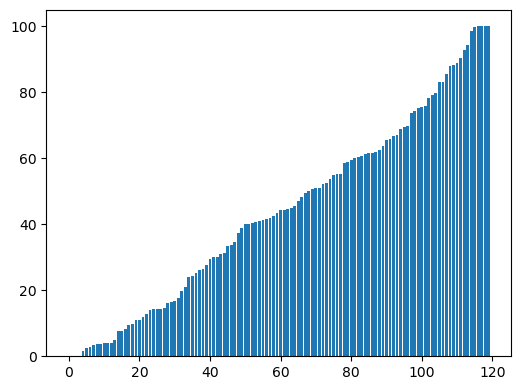

In [377]:
from matplotlib import pyplot as plt
df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
    embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            'expression_percent_normalized_by_max_min']
fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

ax.bar(
    x=list(range(len(df_combined_by_screen_with_unlab.iloc[
        indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
        embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]))),
    height=df_combined_by_screen_with_unlab.iloc[
        indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][
        embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)].sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
)



In [378]:
df_combined_by_screen_with_unlab[['expression_percent_normalized_by_max_min','numeric_class']]

,expression_percent_normalized_by_max_min,numeric_class
0,7.604094,1
1,29.390607,1
2,63.629556,0
3,55.308416,0
4,50.564656,0
...,...,...
115,41.721688,0
116,55.335765,0
117,79.215425,0
118,79.717505,0


# Apply Models individually


In [379]:
effco___

35

120 120
F1: 0.564516129032258
Fbeta: 0.4707278481012658
accuracy: 0.55
MCC: 0.1623749672334102

120 120
F1: 0.5714285714285715
Fbeta: 0.48817567567567566
accuracy: 0.575
MCC: 0.1938006332446037

120 120
F1: 0.5499999999999999
Fbeta: 0.46749999999999997
accuracy: 0.55
MCC: 0.14583333333333334

120 120
F1: 0.5619834710743802
Fbeta: 0.4753289473684211
accuracy: 0.5583333333333333
MCC: 0.16727277335338744

120 120
F1: 0.5737704918032787
Fbeta: 0.4829545454545454
accuracy: 0.5666666666666667
MCC: 0.1889267106516435

120 120
F1: 0.5833333333333334
Fbeta: 0.4958333333333334
accuracy: 0.5833333333333334
MCC: 0.2152777777777778

120 120
F1: 0.5423728813559322
Fbeta: 0.4657534246575342
accuracy: 0.55
MCC: 0.13801311186847084

120 120
F1: 0.5785123966942148
Fbeta: 0.48930921052631576
accuracy: 0.575
MCC: 0.20212126780200984

120 120
F1: 0.5132743362831858
Fbeta: 0.45312500000000006
accuracy: 0.5416666666666666
MCC: 0.10241831129983783

120 120
F1: 0.576271186440678
Fbeta: 0.4948630136986301
accur

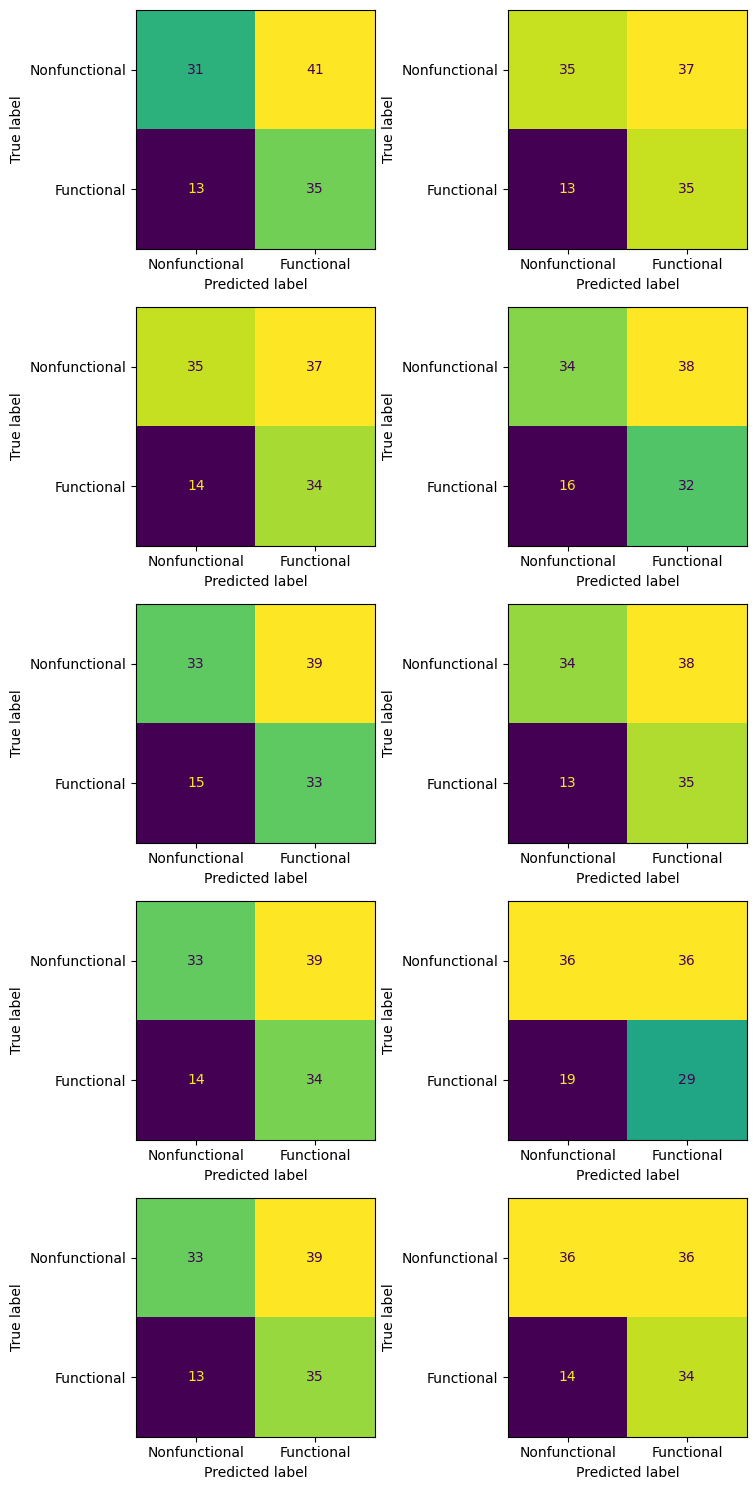

In [380]:
# Apply Models individually
p_ls_2 = []
r_ls_2 = []
fig,axs = plt.subplots(5,2)
fig.set_size_inches(w=8,h=15)
for i_ in range(len(model_file_dict['GloVe'])):
    
    clf_ = clf_ls[i_]
    X_ = np.array([np.array(list(x)) for x in df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)][embedding_+'_embedded_sequences']])
    # Y_ = np.array(df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: x <= 35))
    Y_ = np.array(df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)]['numeric_class'])
    
    
    print(len(X_),len(Y_))
    
    preds_score_ = clf_.predict_proba(X_)[:, 1]
    preds_binary_ = clf_.predict(X_)
    
    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve
    
    p_, r_, t_s = precision_recall_curve(Y_, preds_score_)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_, p_)
    
    p_ls_2.append(p_)
    r_ls_2.append(r_)
    
    from sklearn.metrics import f1_score
    fscore__ = f1_score(Y_, preds_binary_)  # , average=None)
    print('F1:',fscore__)
    
    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_ = fbeta_score(Y_, preds_binary_, beta=f_beta_)  # , average=None)
    # print("Computing fbeta_score with beta = "+str(f_beta_))
    print('Fbeta:',fbetascore_)
    
    from sklearn.metrics import accuracy_score
    accuracy_ = accuracy_score(Y_, preds_binary_)
    print('accuracy:',accuracy_)
    
    from sklearn.metrics import matthews_corrcoef
    mcc_ = matthews_corrcoef(Y_, preds_binary_)
    print('MCC:',mcc_)
    
    print('')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    # tn, fp, fn, tp = confusion_matrix(Y_, preds_binary_).ravel()  
    # ConfusionMatrixDisplay.from_estimator(clf_, X_, Y_)


    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_, preds_binary_),
                                  display_labels=["Nonfunctional","Functional"])
    # Adjust font size for the values inside the matrix
    axi_ = i_%5
    axj_ = int(i_/5)
    disp.plot(ax=axs[axi_,axj_],colorbar=False)
    for txt,l_ in zip( axs[axi_,axj_].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(10)


## Save Figure
fnm_final_ = 'combined_confusion_matrix_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                    


120 120
F1: 0.564516129032258
Fbeta: 0.4707278481012658
accuracy: 0.55
MCC: 0.1623749672334102

120 120
F1: 0.5714285714285715
Fbeta: 0.48817567567567566
accuracy: 0.575
MCC: 0.1938006332446037

120 120
F1: 0.5499999999999999
Fbeta: 0.46749999999999997
accuracy: 0.55
MCC: 0.14583333333333334

120 120
F1: 0.5619834710743802
Fbeta: 0.4753289473684211
accuracy: 0.5583333333333333
MCC: 0.16727277335338744

120 120
F1: 0.5737704918032787
Fbeta: 0.4829545454545454
accuracy: 0.5666666666666667
MCC: 0.1889267106516435

120 120
F1: 0.5833333333333334
Fbeta: 0.4958333333333334
accuracy: 0.5833333333333334
MCC: 0.2152777777777778

120 120
F1: 0.5423728813559322
Fbeta: 0.4657534246575342
accuracy: 0.55
MCC: 0.13801311186847084

120 120
F1: 0.5785123966942148
Fbeta: 0.48930921052631576
accuracy: 0.575
MCC: 0.20212126780200984

120 120
F1: 0.5132743362831858
Fbeta: 0.45312500000000006
accuracy: 0.5416666666666666
MCC: 0.10241831129983783

120 120
F1: 0.576271186440678
Fbeta: 0.4948630136986301
accur

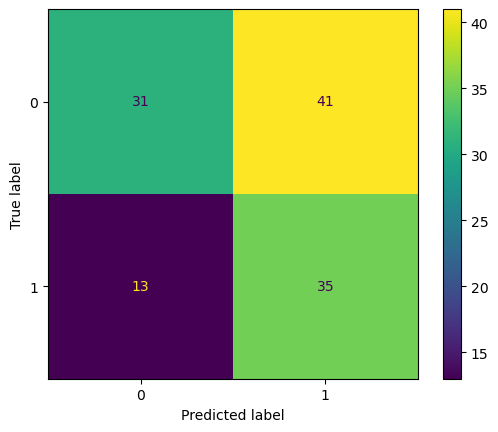

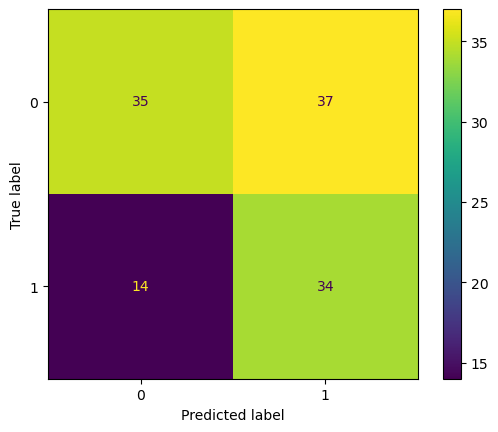

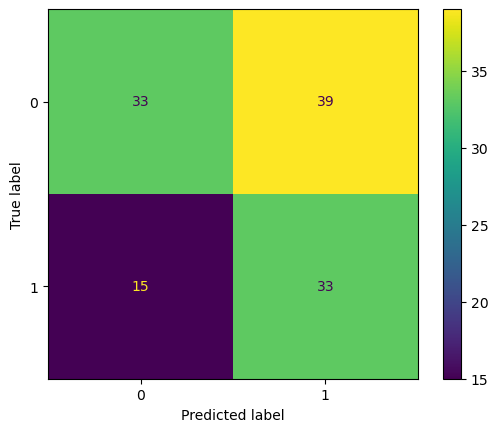

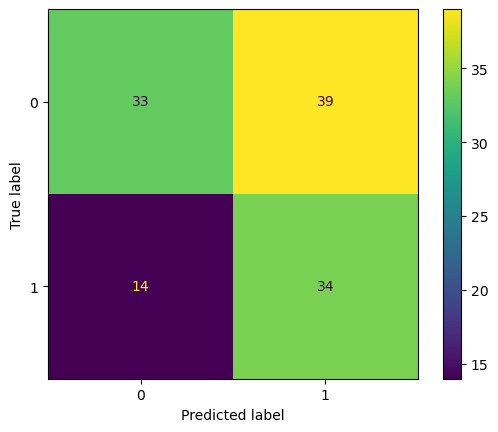

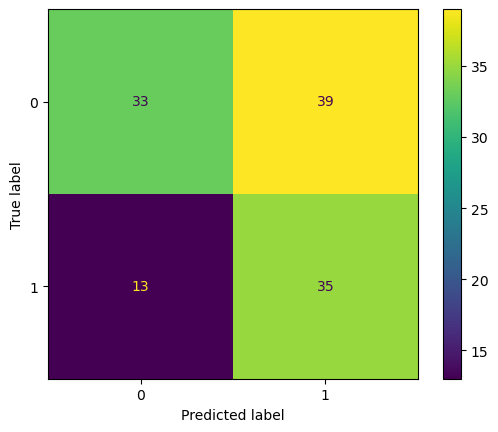

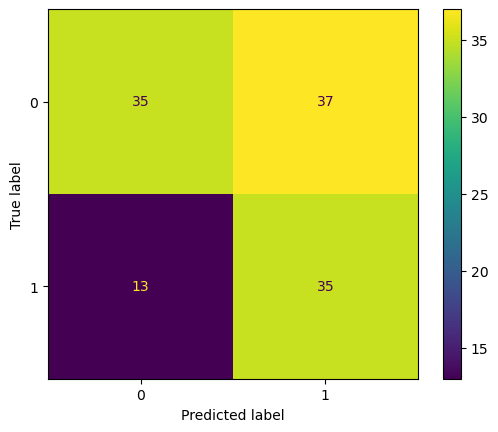

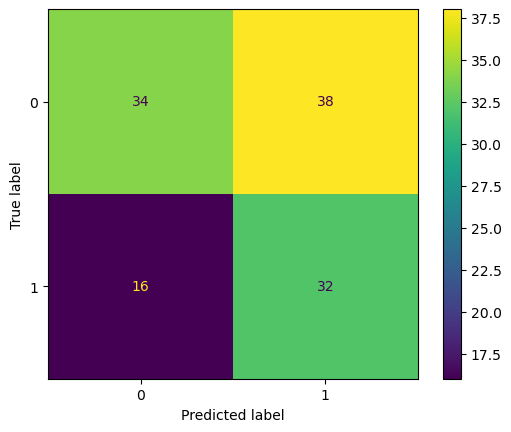

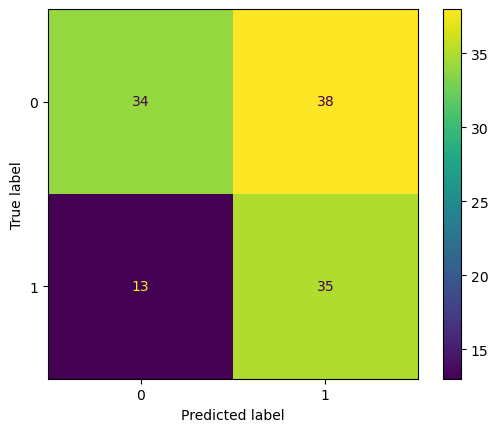

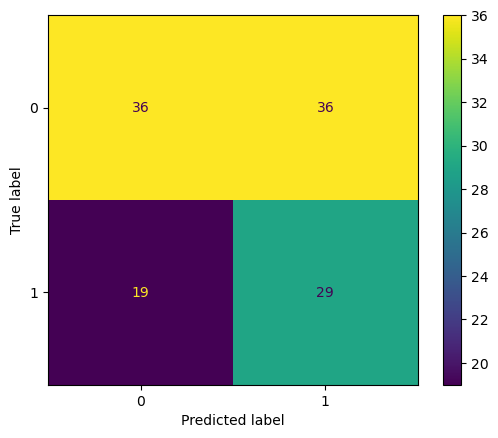

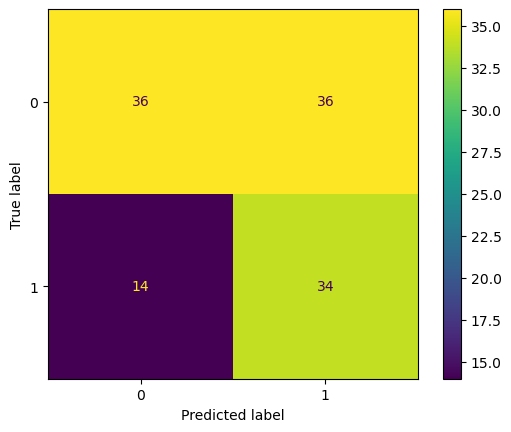

In [381]:
# Apply Models individually
p_ls_2 = []
r_ls_2 = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    X_ = np.array([np.array(list(x)) for x in df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)][embedding_+'_embedded_sequences']])
    # Y_ = np.array(df_combined_by_screen_with_unlab['expression_percent_normalized_by_max_min'].apply(lambda x: x <= 35))
    Y_ = np.array(df_combined_by_screen_with_unlab[(df_combined_by_screen_with_unlab['numeric_class'] != -1)]['numeric_class'])
    
    
    print(len(X_),len(Y_))
    
    preds_score_ = clf_.predict_proba(X_)[:, 1]
    preds_binary_ = clf_.predict(X_)
    
    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve
    
    p_, r_, t_s = precision_recall_curve(Y_, preds_score_)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_, p_)
    
    p_ls_2.append(p_)
    r_ls_2.append(r_)
    
    from sklearn.metrics import f1_score
    fscore__ = f1_score(Y_, preds_binary_)  # , average=None)
    print('F1:',fscore__)
    
    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_ = fbeta_score(Y_, preds_binary_, beta=f_beta_)  # , average=None)
    # print("Computing fbeta_score with beta = "+str(f_beta_))
    print('Fbeta:',fbetascore_)
    
    from sklearn.metrics import accuracy_score
    accuracy_ = accuracy_score(Y_, preds_binary_)
    print('accuracy:',accuracy_)
    
    from sklearn.metrics import matthews_corrcoef
    mcc_ = matthews_corrcoef(Y_, preds_binary_)
    print('MCC:',mcc_)
    
    print('')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_, preds_binary_).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_, Y_)



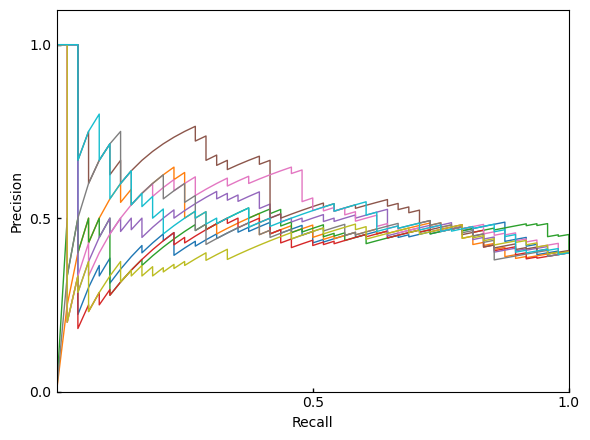

In [382]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

for i_ in range(len(p_ls)):
    ax.plot(
        r_ls_2[i_],  # r_OH,# x
        p_ls_2[i_],  # p_OH,# y
        lw=1,
        #color= 'blue',
    )



# Format Axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
# ax.set_xticks(ticks=np.arange(0, 1.1, .25), minor=True)
ax.tick_params(direction='in', which='both', length=3, width=1)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(ticks=[0.5, 1.0 ], labels=[0.5, 1.0])
ax.set_yticks(ticks=[0.0 , 0.5, 1.0 ], labels=[0.0, 0.5, 1.0])




## Add Legend
# legend_elements = [
#                 Line2D([0], [0],
#            color=testing_set_plot_color, # embd_color_dict[embd_][val__],
#            lw=4, label='Test Set'),
#     Line2D([0], [0],
#            color= external_set_plot_color,#color_,  # embd_color_dict[embd_][val__],
#            lw=4, label='External Dataset')
# ]
# ax.legend(handles=legend_elements, loc='upper left', frameon=False, bbox_to_anchor=(0, 1), title=self.parameter_to_optimize, title_fontsize=12, fontsize=12)
# ax.axis('off')


fig.tight_layout() 


## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fnm_ = 'p-r_curve_'+'ext_split_by_gene_'+'-'.join(model_file_.name.split('/')[0].split('_')[0:-1])
# fig.savefig(fnm_ + '.svg', format='svg', transparent=True)
# fig.savefig(fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t'+str(fnm_) + '.png')





In [383]:
preds_combined_by_screen_with_unlab

array([0.55218779, 0.52471595, 0.54550773, 0.45697798, 0.43716889,
       0.41701919, 0.50737629, 0.51948152, 0.49147704, 0.51935831,
       0.50986411, 0.50924334, 0.52252606, 0.44964796, 0.43532369,
       0.43701378, 0.43072886, 0.45008727, 0.41715334, 0.51950962,
       0.52663323, 0.5234975 , 0.53296178, 0.49345998, 0.48687942,
       0.51134484, 0.507202  , 0.51362528, 0.42892168, 0.54468744,
       0.52238199, 0.45621002, 0.49865472, 0.5111838 , 0.52281637,
       0.52753722, 0.42320816, 0.46829646, 0.50971256, 0.49133298,
       0.50433299, 0.44450497, 0.45638045, 0.44914853, 0.42591388,
       0.4949369 , 0.52719527, 0.51238869, 0.46267722, 0.53248931,
       0.51818539, 0.49180155, 0.50303671, 0.43948331, 0.46012326,
       0.51460278, 0.54356623, 0.53389991, 0.53237167, 0.5252744 ,
       0.5125527 , 0.52065014, 0.53654766, 0.5074869 , 0.54310938,
       0.54715497, 0.53540104, 0.52897361, 0.50114835, 0.53855508,
       0.48220551, 0.53036514, 0.48321223, 0.45341453, 0.52652

In [384]:
Y_combined_by_screen_with_unlab_

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25


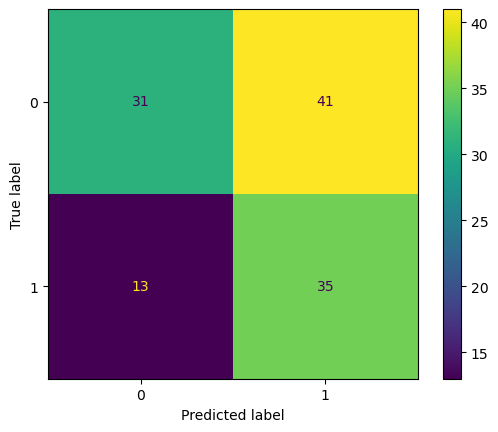

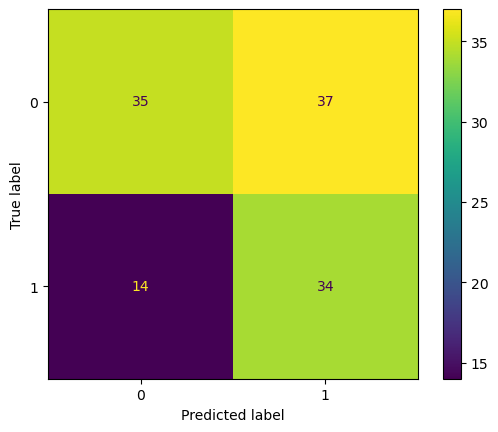

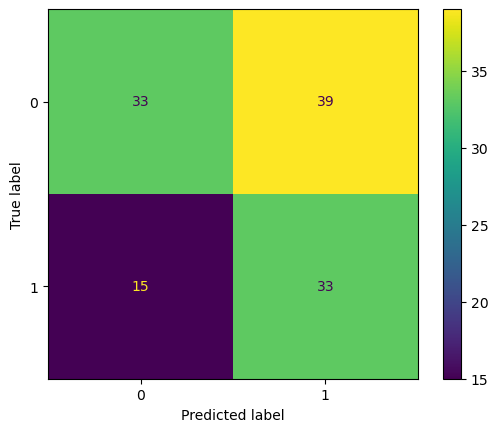

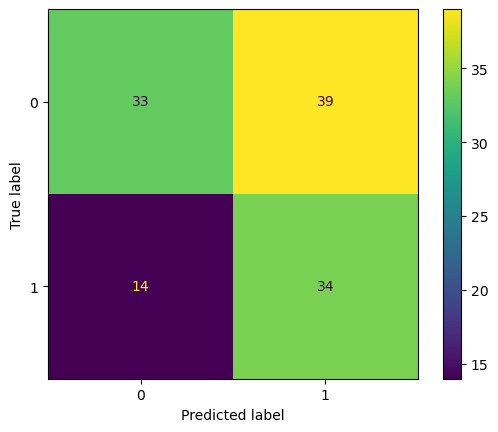

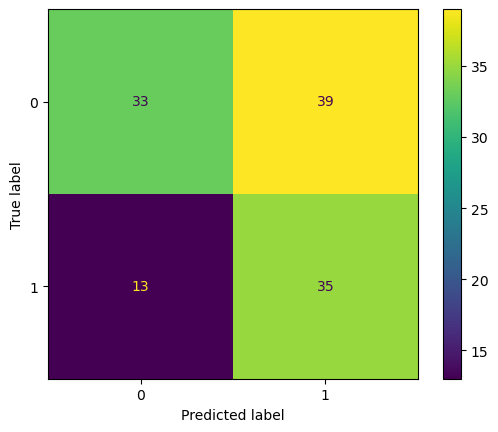

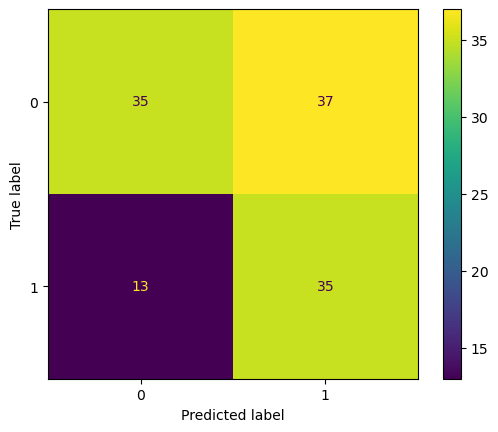

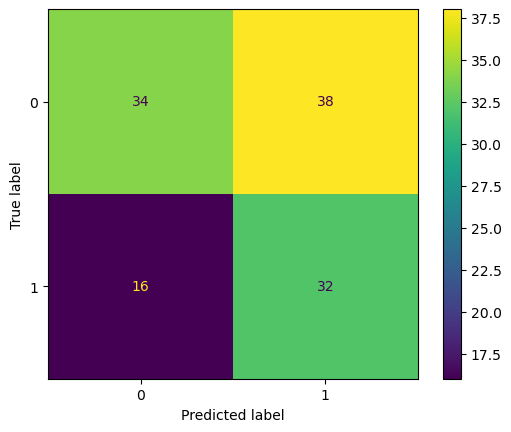

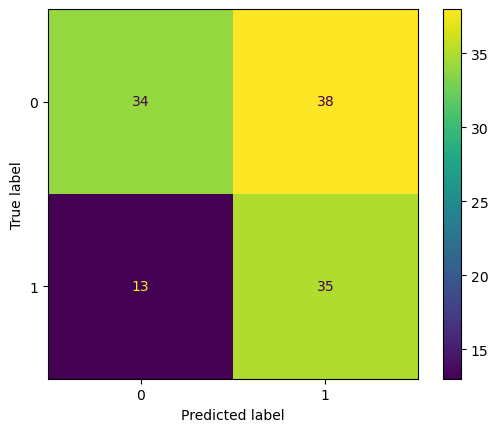

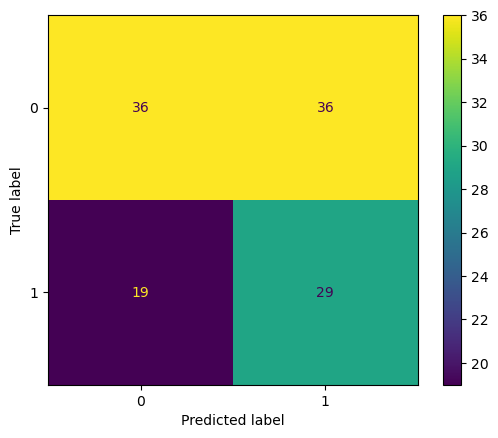

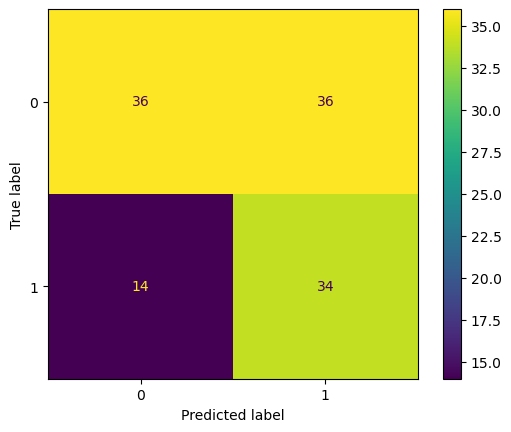

In [385]:
p_ls = []
r_ls = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    import numpy as np
    
    X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list( 
        df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            embedding_+'_embedded_sequences'])])
    
    Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]['numeric_class'])

    # X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'])])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab['numeric_class_no_undef'])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'])

    print(len(X_combined_by_screen_with_unlab_),len(Y_combined_by_screen_with_unlab_))

    preds_combined_by_screen_with_unlab = clf_.predict_proba(X_combined_by_screen_with_unlab_)[:, 1]
    preds_binary_combined_by_screen_with_unlab = clf_.predict(X_combined_by_screen_with_unlab_)

    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve

    p_combined_by_screen_with_unlab_, r_combined_by_screen_with_unlab_, ts_combined_by_screen_with_unlab_ = precision_recall_curve(Y_combined_by_screen_with_unlab_, preds_combined_by_screen_with_unlab)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_combined_by_screen_with_unlab_, p_combined_by_screen_with_unlab_)

    p_ls.append(p_combined_by_screen_with_unlab_)
    r_ls.append(r_combined_by_screen_with_unlab_)
    
    from sklearn.metrics import f1_score
    fscore_combined_by_screen_with_unlab_ = f1_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)  # , average=None)

    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_combined_by_screen_with_unlab_ = fbeta_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab, beta=f_beta_)  # , average=None)
    print("Computing fbeta_score with beta = "+str(f_beta_))

    from sklearn.metrics import accuracy_score
    accuracy_combined_by_screen_with_unlab_ = accuracy_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import matthews_corrcoef
    mcc_combined_by_screen_with_unlab_ = matthews_corrcoef(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_combined_by_screen_with_unlab_, Y_combined_by_screen_with_unlab_)


120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25
120 120
Computing fbeta_score with beta = 0.25


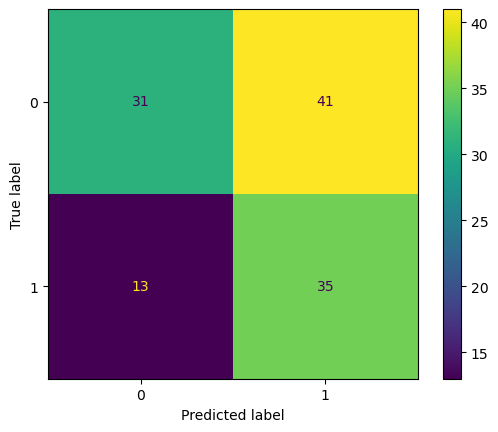

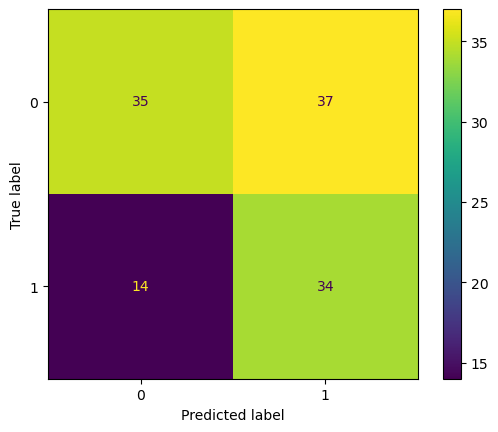

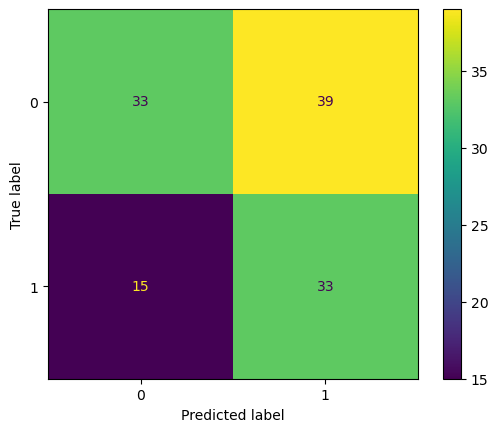

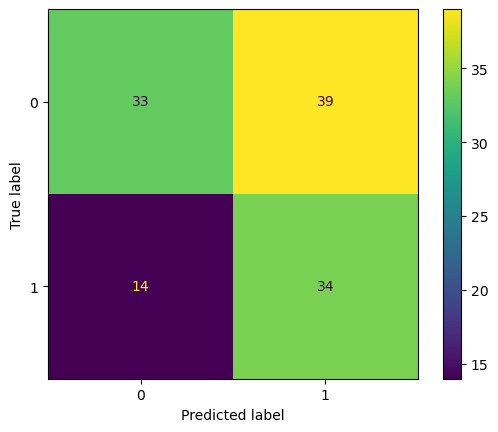

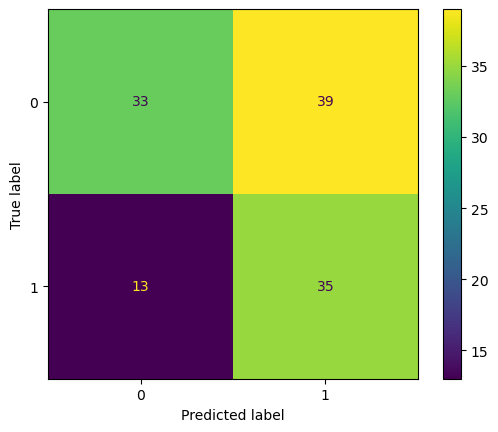

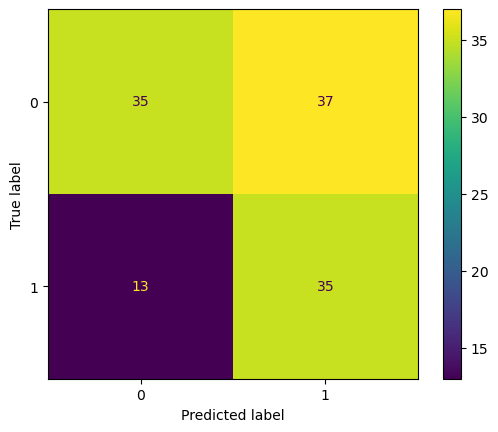

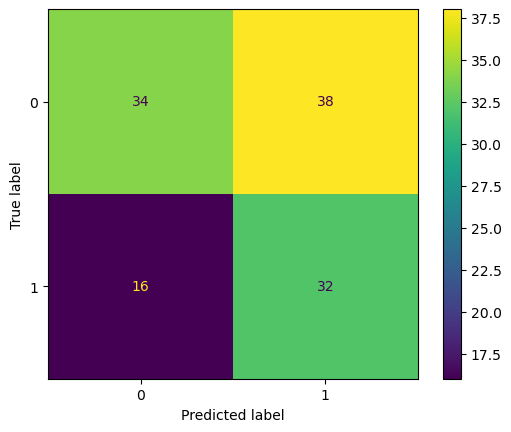

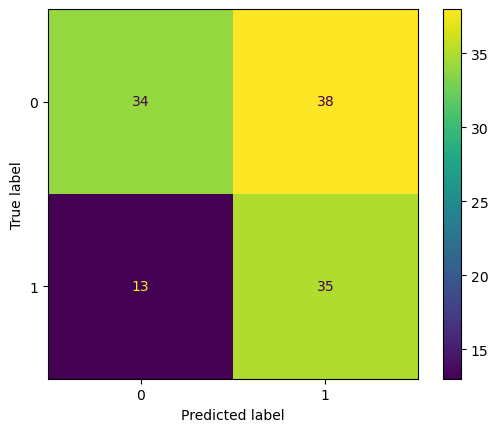

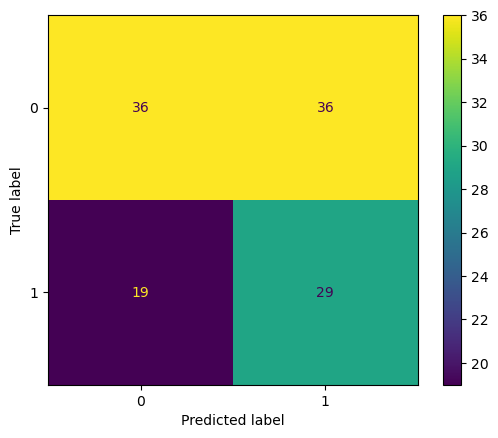

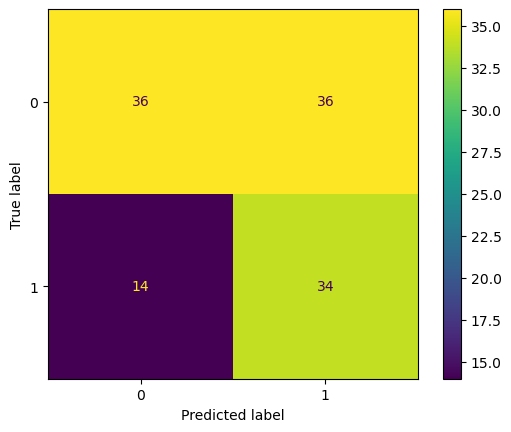

In [386]:
p_ls = []
r_ls = []
for i_ in range(len(model_file_dict['GloVe'])):
    clf_ = clf_ls[i_]
    import numpy as np
    
    X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list( 
        df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)][
            embedding_+'_embedded_sequences'])])
    
    Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'].apply(lambda x: len(x) != 0)]['numeric_class'])

    # X_combined_by_screen_with_unlab_ = np.array([np.array(list(x)) for x in list(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_][embedding_+'_embedded_sequences'])])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab['numeric_class_no_undef'])
    # Y_combined_by_screen_with_unlab_ = np.array(df_combined_by_screen_with_unlab.iloc[indxs_to_include_combined_by_screen_with_unlab_]['numeric_class'])

    print(len(X_combined_by_screen_with_unlab_),len(Y_combined_by_screen_with_unlab_))

    preds_combined_by_screen_with_unlab = clf_.predict_proba(X_combined_by_screen_with_unlab_)[:, 1]
    preds_binary_combined_by_screen_with_unlab = clf_.predict(X_combined_by_screen_with_unlab_)

    ## Evaluate Parameter Optimization Model Performance
    from sklearn.metrics import precision_recall_curve

    p_combined_by_screen_with_unlab_, r_combined_by_screen_with_unlab_, ts_combined_by_screen_with_unlab_ = precision_recall_curve(Y_combined_by_screen_with_unlab_, preds_combined_by_screen_with_unlab)
    aucpr_combined_by_screen_with_unlab_ = metrics.auc(r_combined_by_screen_with_unlab_, p_combined_by_screen_with_unlab_)

    p_ls.append(p_combined_by_screen_with_unlab_)
    r_ls.append(r_combined_by_screen_with_unlab_)
    
    from sklearn.metrics import f1_score
    fscore_combined_by_screen_with_unlab_ = f1_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)  # , average=None)

    from sklearn.metrics import fbeta_score
    f_beta_ = 0.25
    fbetascore_combined_by_screen_with_unlab_ = fbeta_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab, beta=f_beta_)  # , average=None)
    print("Computing fbeta_score with beta = "+str(f_beta_))

    from sklearn.metrics import accuracy_score
    accuracy_combined_by_screen_with_unlab_ = accuracy_score(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import matthews_corrcoef
    mcc_combined_by_screen_with_unlab_ = matthews_corrcoef(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(Y_combined_by_screen_with_unlab_, preds_binary_combined_by_screen_with_unlab).ravel()  
    ConfusionMatrixDisplay.from_estimator(clf_, X_combined_by_screen_with_unlab_, Y_combined_by_screen_with_unlab_)


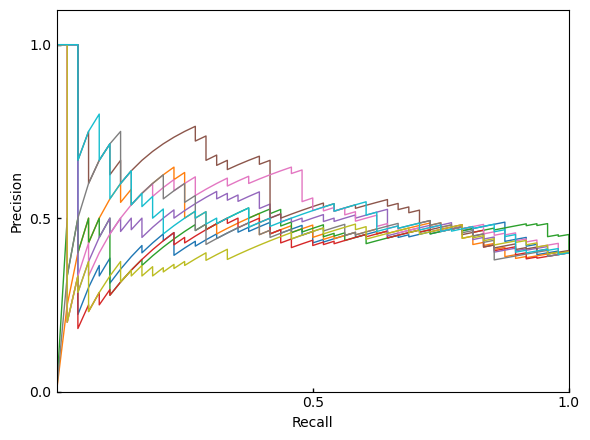

In [387]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(w = 6, h = 4.5)

for i_ in range(len(p_ls)):
    ax.plot(
        r_ls[i_],  # r_OH,# x
        p_ls[i_],  # p_OH,# y
        lw=1,
        #color= 'blue',
    )



# Format Axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
# ax.set_xticks(ticks=np.arange(0, 1.1, .25), minor=True)
ax.tick_params(direction='in', which='both', length=3, width=1)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(ticks=[0.5, 1.0 ], labels=[0.5, 1.0])
ax.set_yticks(ticks=[0.0 , 0.5, 1.0 ], labels=[0.0, 0.5, 1.0])




## Add Legend
# legend_elements = [
#                 Line2D([0], [0],
#            color=testing_set_plot_color, # embd_color_dict[embd_][val__],
#            lw=4, label='Test Set'),
#     Line2D([0], [0],
#            color= external_set_plot_color,#color_,  # embd_color_dict[embd_][val__],
#            lw=4, label='External Dataset')
# ]
# ax.legend(handles=legend_elements, loc='upper left', frameon=False, bbox_to_anchor=(0, 1), title=self.parameter_to_optimize, title_fontsize=12, fontsize=12)
# ax.axis('off')


fig.tight_layout() 


## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fnm_ = 'p-r_curve_'+'ext_split_by_gene_'+'-'.join(model_file_.name.split('/')[0].split('_')[0:-1])
# fig.savefig(fnm_ + '.svg', format='svg', transparent=True)
# fig.savefig(fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t'+str(fnm_) + '.png')





##### bottom
### 1) Go to: [Running Excluding Undefined (middle) Region](#Running-excluding-undefined-middle-region)

### 2) Go to: [Running while KEEPING Undefined Data](#Re-Running-excluding-undefined-middle-region)

[top](#top) | [bottom](#bottom)